In [50]:

from CSE142L.notebook import *
from notebook import *
# if you get something about NUMEXPR_MAX_THREADS being set incorrectly, don't worry.  It's not a problem.


<div class="namebox">    
Double Click to edit and enter your

1.  Casey Hild
2.  A16953257
3.  child@ucsd.edu
    
</div>

<div style=" font-size: 300% !important;
    margin-top: 1.5em;
    margin-bottom: 1.5em;
    font-weight: bold;
    line-height: 1.0;
    text-align:center;">Lab 4: The Memory Hierarchy (Part II)</div>


This lab is a continuation of the previous lab.  While that lab focused on the basics of cache-aware programming and spatial locality, this lab will focus more on temporal locality and how you can modify your programs to maximize it.

As a reminder, between this lab and the last, you'll learn about the concepts of:

1.  Memory alignment
2.  Thinking in cache lines
3.  Working sets
4.  The cache hierarchy
5.  The impact of miss rate on performance
6.  The role of the TLB in determining performance 
7.  Spatial locality
8.  Temporal locality
9.  Cache-aware optimizations
10.  The impact of data structures on memory behavior

Along the way, we'll address several of the "interesting questions" we identified in the first lab, including:

* Why does increasing the size of array change `CPI`? And why does this change occur so quickly?
* How and why do the datatypes we use change `IC` and  `CPI`?
* Why does the order in which the program performs calculations affect `CPI`?

This lab includes a programming assignment. 

Check the course schedule for due date(s).

# FAQ and Updates

* There are no updates, yet.

# Additional Reading

If you want to learn _a lot_ more about optimizing matrix multiply, try this paper:  https://www.cs.utexas.edu/~flame/pubs/GotoTOMS_revision.pdf

# Using in the Correct Environment on DataHub

<div class="alert alert-block alert-danger">

**Use the right Datahub environment** There is a different environment for each lab on DataHub, and you must use the correct environment when working on the corresponding lab.

</div>
To get into the right environment when you start a new lab, you should:

1.  Connect to Datahub.  If it takes you to the menu of environments, select the appropriate one.
2.  Otherwise, click "Control Panel" in the upper right.
3.  Then click "Stop my Server"
4.  Click "Start my Server" which should take you to the menu of environments.

# Pre-Lab Reading Quiz

Part of this lab is a pre-lab quiz. The pre-lab quiz is on Canvas.  It is due **on Wednesday before Section A meets** (check Canvas for the time).  It's not hard, but it does require you to read over the lab before class.  If you are having trouble accessing it, make sure you are **logged into Canvas**.

##  How To Read the Lab For the Reading Quiz

The goal of reading the lab before starting on it is to make sure you have a preview of:

1.  What's involved in the lab.
2.  The key concepts of the lab.
3.  What you can expect from the lab.
4.  Any questions you might have.

These are the things we will ask about on the quiz.  You _do not_ need to study the lab in depth.  You _do not_ need to run the cells.

You should read these parts carefully:

* Paragraphs at the top of section/subsections
* The description of the programming assignment
* Any other large blocks of text
* The "About Labs in This Class" section (Lab 1 only)

You should skim these parts:

* The questions.

You can skip these parts:

* The "About Labs in This Class" section (Labs other than Lab 1)
* Commentary on the output of code cells (which is most of the lab)
* Parts of the lab that refer to things you can't see (like cell output)
* Solution to completeness questions.


## Taking the Quiz

You can find it here: https://canvas.ucsd.edu/courses/40763/quizzes

The quiz is "open lab" -- you can search, re-read, etc. the lab.

You can take the quiz 3 times.  Highest score counts.

# Browser Compatibility

We are still working out some bugs in some browsers.  Here's the current status:

1.  Chrome -- well tested.  Preferred option. **Required for Moneta**
2.  Firefox -- seems ok, but not thoroughly tested.
3.  Edge -- seems ok, but not thoroughly tested.
4.  Safari -- not supported at the moment.
5.  Internet Explorer -- not supported at the moment.

At the moment, the authentication step must be done in Chrome.  You usually _will not_ have to re-authenticate between labs, so if things work OK for the first, things will probably work here. 

# About Labs In This Class

_This section is the same in all the labs.  It's repeated here for your reference._

Labs are a way to **learn by doing**.  This means you _must_ **do**.  I have built these labs as Jupyter notebooks so that the "doing" is as easy and seamless as possible.

In this lab, what you'll do is answer questions about how a program will run and then compare what really happened to your predictions.  Engaging with this process is how you'll learn.  The questions that the lab asks are there for several purposes:

1.  To draw your attention to specific aspects of an experiment or of some results.
2.  To push you to engage with the material more deeply by thinking about it.
3.  To make you commit to a prediction so you can wonder why your prediction was wrong or be proud that you got it right.
4.  To provide some practice with skills/concepts you're learning in this course.
5.  To test your knowledge about what you've learned.

The questions are graded in one of three ways:

1. "Correctness" questions require you to answer the question and get the correct answer to get full credit.
2. "Completeness" questions require you to answer (even if incorrectly) all parts of the question to get credit.
3. "Optional" questions are...optional.  They are there if you want to go further with the material.

Some of the "Completeness" problems include a solution that will be hidden until you click "Show Solution".  To get the most from them, try them on your own first.

Many of the "Completeness" questions ask you to make predictions about the outcome of an experiment and write down those predictions.  To maximize your learning, think carefully about your prediction and commit to it.  **You will never be penalized for making an incorrect prediction.**

You are free to discuss "Completeness" and "Optional" questions with your classmates.  You must complete "Correctness" questions on your own.

If you have questions about any kind of question, please ask during office hours or during class.

## How To Succeed On the Labs

Here are some simple tips that will help you do well on this lab:

1.  Read/skim through the entire lab _before_ class.  If something confuses you, you can ask about it.
2.  Start early.  Getting answers on piazza can take time.  So think through the lab questions (and your questions about them) carefully.
    1. Go through the lab once (several days before the deadline), do the parts that are easy/make sense
    2. Ask questions/think about the rest
    3. Come back and do the rest.
3.  Start early.  The DSMLP cluster gets busy and slow near deadlines.  "The cluster was slow the night of the deadline" is not an excuse for not getting the lab done and it is not justification for asking for an extension.
4.  Follow the guidelines below for asking answerable questions on piazza.

You may think to yourself: "If I start early enough to account for all that, I'd have to start right after the lab was assigned!"  Good thought!

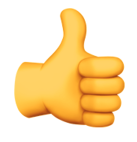


<div class="alert alert-block alert-danger">

**The Cluster Will Get Slow** DSMLP and our cloud machines will get crowded and slow _before every deadline_.  This is completely predictable.  DSMLP can also get crowded due to deadlines in other courses.  You need to start early so you can avoid/work around these slowdowns.  Unless there's some kind of complete outage, we will not grant extensions because the servers are crowded.
    
</div>

## Getting Help

You might run into trouble while doing this lab.  Here's how to get help:

1.  Re-read the instructions and make sure you've followed them.
2.  Try saving and reloading the notebook.
3.  If it says you are not authenticated, go to the [the login section of the lab](#Logging-In-To-the-Course-Tools) and (re)authenticate.
4.  If you get a `FileNotFoundError` make sure you've run all the code cells above your current point in the lab.
4.  If you get an exception or stack dump, check that you didn't accidentally modify the contents of one of the python cells.
5.  If all else fails, post a question to piazza.

## Posting Answerable Questions on Piazza

If you want useful answers on piazza, you need to provide information that is specific enough for us to provide a useful answer.  Here's what we need:

1.  Which part of which lab are you working on (use the section numbers)?
2.  Which problem (copy and paste the _text_ of the question along with the number).

If it's question about instructions:

1.  Try to be as specific as you can about what is confusing or what you don't understand (e.g., "I'm not sure if I should do _X_ or _Y_.")

If it's a question about an error while running code, then we need:

1.  If you've committed anything, your github repo url.
2.  If you've submitted a job with `cse142` you _must_ provide the job id.  It looks like this: `544e0cf2-4771-43c3-86f8-1c30d7af601f`.  With the id, we can figure out just about anything about your job.  Without it, we know nothing.
3.  The _entire_ output you received.  There's no limit on how long an piazza post can be.  Give us all the information, not just the last few lines.  We like to scroll!

For all of the above **paste the text** into the piazza question.  Please **do not provide screen captures**.  The course staff refuses to type in job ids found in screen shots.


<div class="alert alert-block alert-danger">

**We Can't Answer Unanswerable Questions** If you don't follow these guidelines (especially about the github repo and the job id), we will probably not be able to answer your question on piazza.  We will archive it and ask you to re-post your question with the information we need.
    
</div>

## Keeping Your Lab Up-to-Date

`pull-updates` is causing more trouble than it's worth, so it's been removed for this lab.

~Occasionally, there will be changes made to the base repository after the
assignment is released.  This may include bug fixes and updates to this document.  We'll post on piazza when an update is available.~

~In those cases, you can use `./pull-updates` to pull the changes from upstream and merge them into your code.  You'll need to do this at a shell.  It won't work properly in the notebook.  Save your notebook in the browser first.~
 
~Then, change to your lab directory and do~

```
./pull-updates
```


Then, reload this page in your browser.

## Writing Code Outside Jupyter Notebook

The code for some programming assignments could get pretty long.  If you'd like, you can develop outside of Jupyter Notebook.

You can do this by removing the call to `code()` and replacing it with a file name.  Then `build()` will use the source code in the file.

<div class="alert alert-block alert-warning">

**Don't overwrite your code**:  `code()` does some checks to try to avoid overwriting your code and will throw an exception if it found modifications to files it wrote earlier.  This seems to work pretty well, but I wouldn't trust it, so commit often.
    
</div>


## Using VSCode

You can also develop remotely using Microsoft VSCode. You can find instructions from campus about how to do this on Datahub under "Visual Studio (VS) Code" at this link: https://support.ucsd.edu/services?id=kb_article_view&sysparm_article=KB0032269&sys_kb_id=01322d481b5ed514d1b0a935604bcb7a

The TAs report that this works fine.

A few things to note:

1. That pages lists several ways of starting docker containers on the campus servers. The configuration for this class is a little unusual, and none of the other methods listed on that page have been tested for this class. I suspect they don't work, and we won't be fixing them.
2. You'll need to be on campus or on the campus VPN.
3. Using VSCode is not officially supported in this class. If it doesn't work for you, the TAs may be willing help you and you might have luck submitting a ticket to campus, but if you can't get it to work, you'll need to fall back on working through Jupyter Notebook.

## How To Use This Document

You will use Jupyter Notebook to complete this lab.  You should be able to do much of this lab without leaving Jupyter Notebook.  The main exception will be some parts of the some of the programming assignments.  The instructions will make it clear when you should use the terminal.

### Logging In

If you haven't already, you can go to [the login section of the lab](#Logging-In-To-the-Course-Tools) and follow the instructions to login into the course infrastructure.

### Running Code

Jupyter Notebooks are made up of "cells".  Some have Markdown-formatted text in them (like this one).  Some have Python code (like the one below).

For code cells, you press `shift-return` to execute the code.  Try it below:

In [ ]:
print("I'm in python")

Code cells can also execute shell commands using the `!` operator.  Try it below:

In [ ]:
!echo "I'm in a shell"

### Telling What The Notebook is Doing

The notebook will only run one cell at a time, so if you press `shift-return` several times, the cells will wait for one another.  You can tell that a cell is waiting if it there's a `*` in the `[]` to the left the cell:

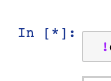


You'll can also tell _where_ the notebook is executing by looking at the table of contents on the left.  The section with the currently-executing cell will be red:

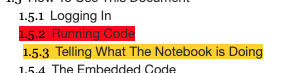

### What to Do If Jupyter Notebook It Gets Stuck

First, check if it's actually stuck: Some of the cells take a while, but they will usually provide some visual sign of progress.  If _nothing_ is happening for more than 10 seconds, it's probably stuck.

To get it unstuck, you stop execution of the current cell with the "interrupt button":

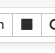

You can also restart the underlying python instance (i.e., the confusingly-named "kernel" which is not the same thing as the operating system kernel) with the restart button:

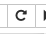

Once you do this, all the variables defined by earlier cells are gone, so you may get some errors.  You may need to re-run the cells in the current section to get things to work again.

You can also try reloading the web page.  That will leave Python kernel intact, but it can help with some problems.

### Common Errors and Non-Errors

1.  If you get `sh: 0: getcwd() failed: no such file or directory`, restart the kernel.
2.  If you get `INFO:MainThread:numexpr.utils:Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.`.  It's not a real error.  Ignore it. 
3.  If you get a prompt asking `Do you want to cancel them and run this job?` but you can't reply because you can't type into an output cell in Jupyter notebook, replace `cse142 job run` with `cse142 job run --force`. (see useful tip below.)
4.  If you get an `Error: Your request failed on the server: 500 Server Error: Internal Server Error for url=http://cse142l-dev.wl.r.appspot.com/file`, trying running the job again.
5.  Sometimes `cse142 job run` will just sit there and seemingly do nothing.  Weirdly, interrupting the kernel (button above) seems to jolt it awake and cause it to continue.
6.  These errors while display CFGs are harmless:
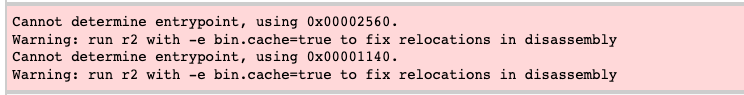
6.  Warnings like this in pink about deprecated or ignored arguments are harmless:

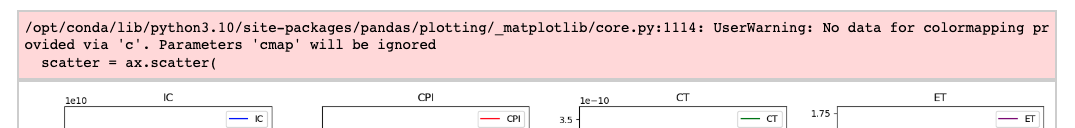

7. If you get `http.cookiejar.LoadError: '/home/youruserrname/.djr-cookies.txt does not look like like a Netscape format cookies file.` remove the file and re-authenticate.
8. If you get 

```
You already have one or more jobs submitted or running.
a26fc9cc-ba36-4f49-89ea-1f36b16b5ea4    you@ucsd.edu    CREATED    2022-10-07 23:46:18.709330+00:00    true
Do you want to cancel them and run this job? [y/N]: 
```

You can run `cse142 job run --lab intro --take NOTHING true` and it should fix it.

9. If you get a big list of files that ends like this:

```
.cfiddle/builds/build/MORE_INCLUDES_-I_cse142L_CSE141pp-Tool-Moneta_moneta__nibble/nibble_29.so
.cfiddle/builds/build/MORE_INCLUDES_-I_cse142L_CSE141pp-Tool-Moneta_moneta__nibble/nibble_76.so
If you want to upload more than 200 files, pass '--input-file-count-limit '.
```

It means you have too many files in your local directory.  You can delete some of them or do what the error says and pass a large value to `--input-file-count-limit` (although that will make running jobs quite slow for you).  A good candidate for deletion is your `.cfiddle` folder.  You remove but you may need re-run some of your `build()` cells afterwards:

In [ ]:
#!rm -rf .cfiddle

10.  If you get this

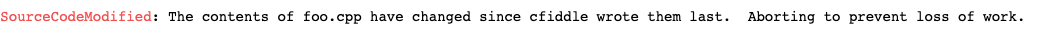

This means that cfiddle's `code()` function detected a change to the file mentioned (`foo.cpp` in the error above) and it is refusing to overwrite it, so it doesn't destroy your changes.  This can happen, for example, if you've edited the file in VSCode.  You can either 

    1. Delete the file (`rm foo.cpp`) and re-execute the cell.
    2. Delete the file, and replace the argument to `code()` with the new contents of the file, so you can keep editing in Jupyter notebook.
    3. Keep editing the file externally and replace the call to `code()` with the file name.

### Useful Tips

1.  If you need to edit a cell, but you can't you can unlock it by pressing this button in the tool bar (although you probably shouldn't do this because it might make the lab work incorrectly.  A better choice is to copy and paste the cell, _and then_ unlock the copy):
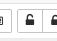

### The Embedded Code

The code embedded in the lab falls into two categories:

1.  Code you need to edit and understand.
2.  Code that you do not need to edit or understand -- it's just there to display something for you.

For code in the first category, the lab will make it clear that you need to study, modify, and/or run the code.  If we don't explicitly ask you to do something, you don't need to.

Most of the code in the second category is for drawing graphs.  You can just run it with shift-return to the see the results.  If you are curious, it's mostly written with `Pandas` and `matplotlib`.   These cells should be un-editable.  However, if you want to experiment with them, you can copy _the contents_ of the cell into a new cell and do whatever you want (If you copy the cell, the copy will also be uneditable).

<div class="alert alert-block alert-info">

**Most Cells are Immutable** Many of the cells of this notebook are uneditable. The only ones you should edit are some of the code cells and the text cells with questions in them.
</div>

<div class="alert alert-block alert-info">

**Pro Tip** The "carrot" icon in the lower right (shown below) will open a scratch pad area.  It can be a useful place to do math (or whatever else you want).
    
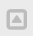
</div>

### Showing Your Work

Several questions ask you to show your work for calculations.  We don't need anything fancy.  Many of the questions ask you to compute something based on results of an experiment.  Your experimental results will be different than others', so your answer will be different as well.

To make it possible to grade your work (and give you partial credit), we need to know where your answer came from.  This is why you need to show your work.  For instance this would be fine as answer to "On average, how many weeks do you have per lab?":

```
Weeks in quarter/# of labs = 10/5 = 2 weeks/lab
```

2 significant figures is sufficient in all cases, but you can include more, if you want.

If you are feeling fancy, you can use LaTex, but it's not at all required.

When it's appropriate, you can also paste in images.  However, Jupyter Notebook is flaky about it.  Save frequently.

###  Saving Your Work and Making Sure Your Connected to the Server

In theory, Jupyter Notebook saves automatically.  However, a few things can go wrong:

If your Datahub server shuts down, you can still edit your notebook, but you won't be able to save it.  

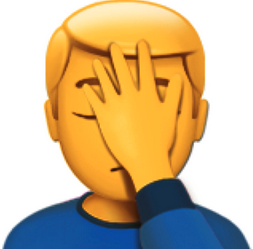

You can tell your server has stopped if there's a red box in the upper right that says "Not Connected":

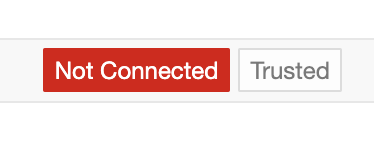

If this happens, you should stop working, restart your server and reload the lab.

In any case, it's a good idea to save frequently:

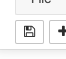


### Answering Questions

Throughout this document, you'll see some questions (like the one below).  You can double click on them to edit them and fill in your answer.  Try not to mess up the formatting (so it's easy for us to grade), but at least make sure your answer shows up clearly.  When you are done editing, you can `shift-return` to make it pretty again.

A few tips, pointers, and caveats for answering questions:

1. The answers are all in [github-flavored markdown](https://guides.github.com/features/mastering-markdown/) with some html sprinkled in.  Leave the html alone.
2. Many answers require you to fill in a table, and many of the `|` characters will be missing.  You'll need to add them back.
3. The HTML needs to start at the beginning of a line.  If there are spaces before a tag, it won't render properly.  If you accidentally add white space at the beginning of a line with an html tag on it, you'll need to fix it.
4. Text answers also need to start at the beginning of a line, otherwise they will be rendered as code.
5. Press `shift-return` or `option-return` to render the cell and make sure it looks good.
6. There needs to be a blank line between html tags and markdown.  Otherwise, the markdown formatting will not appear correctly.


You'll notice that there are three kinds of questions: "Correctness", "Completeness", and "Optional".  You need to provide an answer to the "Completeness" questions, but you won't be graded on its correctness.  You'll need to answer "Correctness" questions correctly to get credit.  The "Optional" questions are optional.

# Logging In To the Course Tools

    
In the course you will use some specialized tools to let you perform detailed measurements of program behavior.  To use them you need to login with your `@ucsd.edu` email address using the instructions below. **You need to use the email address that appears on the course roster.  That's the email address we created an account for.  In almost all cases, this is your `@ucsd.edu` email address.**

You'll probably only have to do this once this quarter, but if you get an error about not being authenticated, just re-authenticate.  You can return to this notebook (or any other of the lab notebooks) to login at any time.

Here's what to do:

1.  Enter your `@ucsd.edu` email address (without the '<>') in quotes after `login` below.  It'll take a few seconds to load.
2.  Click the google "G" login button below and login with your `@ucsd.edu` email address. 
3. **Click the google button regardless of whether it says "sign in" or "signed in".  Then be sure to select your `@ucsd.edu account` if it shows you multiple google acocunts**
4. You'll see a very long string numbers an letters appear above.  Click "Copy it" to copy it.

**Note:** If it doesn't give you a choice about which account to log into and authentication fails, that means you are logged into a single Google account and that account is _not_ your `@ucsd.edu` account.  You'll have to log into your `@ucsd.edu` through Gmail or through Chrome's account manager and then try again.

<div class="alert alert-block alert-danger">

**Use Chrome** The login process doesn't seem to work properly with Safari or Firefox.  Use Chrome to login.  You can use any of the other compatible browsers you want for the doing the rest of the lab, and it should be fine.

</div>



In [8]:
login("child@ucsd.edu") 


Next step:  Paste it below between the quote marks.  Press `shift-return`.

In [9]:
token("eyJhbGciOiJSUzI1NiIsImtpZCI6IjI3Yjg2ZGM2OTM4ZGMzMjdiMjA0MzMzYTI1MGViYjQzYjMyZTRiM2MiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJhY2NvdW50cy5nb29nbGUuY29tIiwiYXpwIjoiMjgwMzY3MjAzNDk1LWdzczA1cGtzN2o3MDExYmhhODl0YWg2NzRrbDVicDV1LmFwcHMuZ29vZ2xldXNlcmNvbnRlbnQuY29tIiwiYXVkIjoiMjgwMzY3MjAzNDk1LWdzczA1cGtzN2o3MDExYmhhODl0YWg2NzRrbDVicDV1LmFwcHMuZ29vZ2xldXNlcmNvbnRlbnQuY29tIiwic3ViIjoiMTE1NzA1NTY3ODUxNjkyNjc0ODMwIiwiaGQiOiJ1Y3NkLmVkdSIsImVtYWlsIjoiY2hpbGRAdWNzZC5lZHUiLCJlbWFpbF92ZXJpZmllZCI6dHJ1ZSwiYXRfaGFzaCI6IktDU2YwSXpKb3VBRE9PQ1lQc3pnc1EiLCJuYW1lIjoiQ2FzZXkgSGlsZCIsInBpY3R1cmUiOiJodHRwczovL2xoMy5nb29nbGV1c2VyY29udGVudC5jb20vYS9BTG01d3UxN1l3WFlxTkdBWkdDWFQyclFkZFBiZUJuTFVYNzJuckdCTFdaOT1zOTYtYyIsImdpdmVuX25hbWUiOiJDYXNleSIsImZhbWlseV9uYW1lIjoiSGlsZCIsImxvY2FsZSI6ImVuIiwiaWF0IjoxNjY5MTUwNTAyLCJleHAiOjE2NjkxNTQxMDIsImp0aSI6IjFiNGNmYjBkMGNiMTI0Nzk5Y2JmZjJmNzMzN2I5MzkxYjE1NWE0NTkifQ.Te1ri6gC7SRC4XychAVLVd6xlcNv4-o0nI9ZQGJgfxoZK-YH7KYsUZAt2fCLZGhDPabIYXUwIZjx1EUEPk8IdC165PY3Q-dPQyl1ZE7ZxKsHvtv_wtK5gCufzgmFJTDm-5_iqRT6XB7Z4AiJNvOMvm2abSorFiB0bDBVA_5yQ9_Iki1WW4TOIeNrlgd4yjfcftP9Hw-v38GB1qf8sj6NpHrjfXal1cvY0X8tcYbecPJpwuJURDHMtJd8q_wsa8dflaZxzy1kWDEgQjhZ13mYdHVKnZ3vzisXEb7tZF3DA7LN9W_TMf1TV376eqGmoMU6W7ED6N28M6kgVMr5hAUiUw")

You are authenticated as child@ucsd.edu



It should have replied with

``` 
You are authenticated as <your email>
```

You are now logged in!  Try submitting a job: 

In [11]:
!cse142 job run "echo Hello World"

You are submitting a job for lab "Lab 4: Caches II" (caches2).
Creating job 15bb9e81-6cb9-4365-8ab2-c7c4da041713 0.00 0.00
Ready for submission. 2.34 2.34
Job 15bb9e81-6cb9-4365-8ab2-c7c4da041713 is in state 'PUBLISHED'. 2.03 4.38 
Job 15bb9e81-6cb9-4365-8ab2-c7c4da041713 is in state 'RUNNING'. 1.04 5.41 
Job 15bb9e81-6cb9-4365-8ab2-c7c4da041713 is in state 'DONE_RUNNING'. 1.04 6.45... 
Job 15bb9e81-6cb9-4365-8ab2-c7c4da041713 succeeded. 4.16 10.61Writing results 1.00 11.61
Hello World
Updated these files: 
Job Complete 0.33 11.94


If you see "Hello World", you're all set.  Proceed with the lab!

<div class="alert alert-block alert-danger">

Delete your token from the above cell (`token("...")`). Because your token is essentially your username and password combined, you should treat it like a password or ssh private key.  **Sharing your token with another student or possessing another student's token is an AI violation**.
</div>

# Grading

Your grade for this lab will be based on the following components

| Part                       | value |
|----------------------------|-------|
| Reading quiz               | 3%    |
| Jupyter Notebook           | 45%   |
| Programming Assignment     | 50%   |
| Post-lab survey.           | 2%    |

No late work or extensions will be allowed.

We will grade 5 of the "completeness" problems.  They are worth 3 points each.  We will grade all of the "correctness" questions.

You'll follow the directions at the end of the lab to submit the lab write up and the programming assignment through gradescope. 

Please check gradescope for exact due dates.

# New Tools

The only new tool you'll be using in this lab is a new kind of graph that visualizes a "trace" of memory accesses made by a program.  Traces get used a lot in computer system analysis.  In this case, it's a memory trace which is just a list of all of memory accesses a program makes.  
We generate the trace using [Intel's Pin binary instrumentation tool](https://www.intel.com/content/www/us/en/developer/articles/tool/pin-a-dynamic-binary-instrumentation-tool.html), which can do all kinds of cool things.  In our case, it injects code into the running executable that writes the address of each load and store to a file along with some metadata (e.g., which thread made the access, whether it was read or write).

Here's an example:


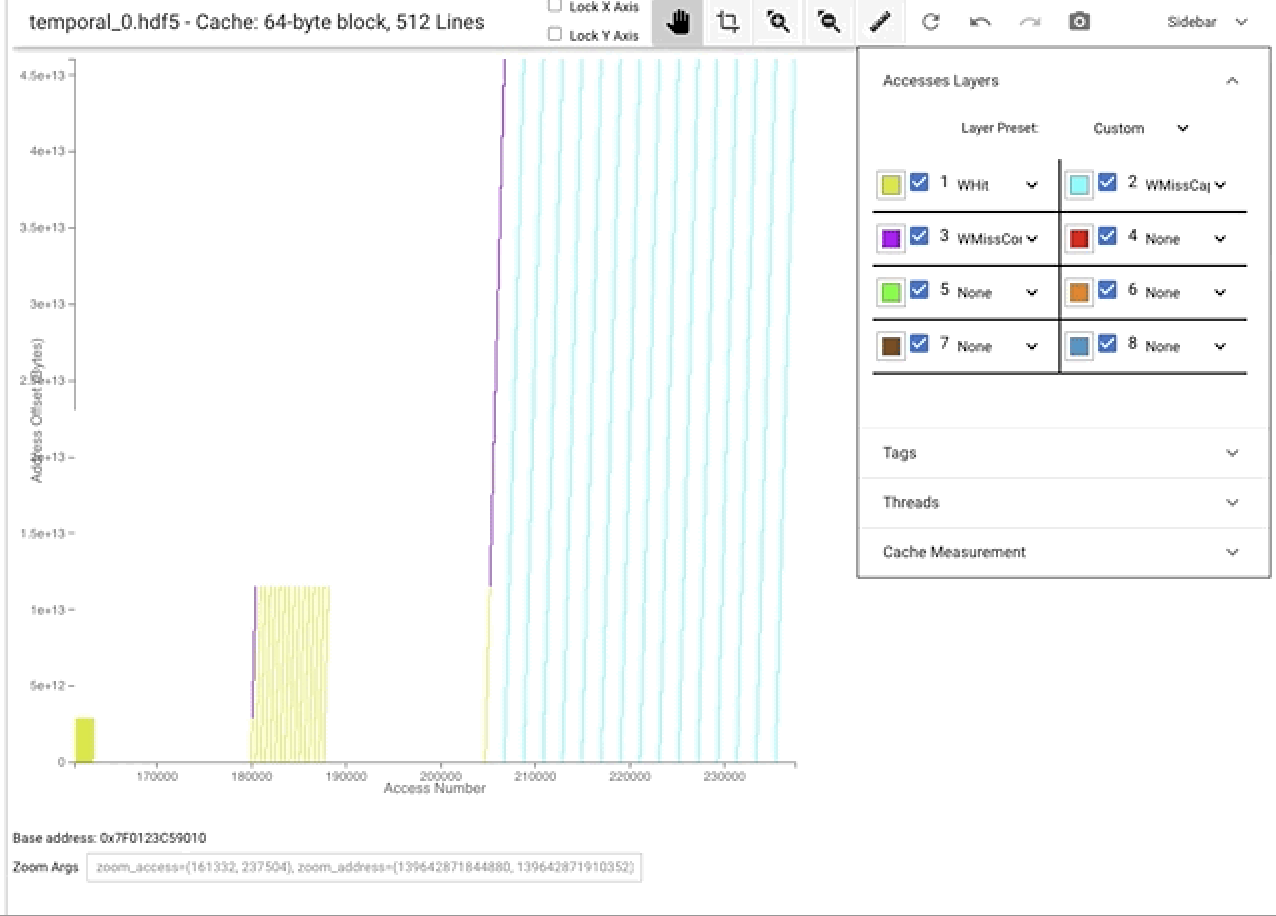


The horizontal axis is the "access number".  The first memory access in the program has access number 1, the second has access number 2, and so on.  The vertical axis is the relative address.  The colors mean different things in different plots.

You might ask "Why are these graphs janky screen captures?"  Well, the graphs were rendered with a very cool Jupyter Notebook extension called Moneta that some of the first students to take 142L wrote as a group independent study during the spring of 2020 (the first quarter of the pandemic).  It was an awesome interactive tool that let you pan and zoom and measure memory traces.  However, it suffered from two key flaws:

1.  It was entirely too much for datahub to handle.  It used vast amounts of memory and would routinely crash students' virtual machines.
2.  It relied on some obsolete python libraries.

Moneta II is in the works to address these problems, but it's not ready yet.  So, for now, we have screen caps.

# Temporal Locality

In the last lab, we examined the notion of spatial locality in detail.  Now, we will turn to temporal locality.

Temporal locality exists when a program accesses the same memory multiple times within a short time.  Caches exploit temporal locality by holding on to data that has been accessed recently.  If the processor accesses it again, the cache can provide it very quickly.

With spatial locality, it was pretty easy to predict the cache miss rate for a simple loop that performs stride-based accesses (see below).  With temporal locality it is harder because of associativity and conflicts.  Before we dive into that, let's have quick refresher about how caches work (if this is fuzzy, go back and review the slides and/or readings).

When a memory operation (load or store) accesses a memory location, $A$, the cache breaks $A$'s address into three parts: 

| tag | index | offset | 
|-----|-------|--------|
| the remaining bits | `log2(# of associative sets)` | `log2(cache line size)`|

Together, the tag and the index of $A$ are a unique name (or number) for the cacheline-sized (and cacheline size-aligned) piece of memory that contains $A$.  The index of $A$ tells the cache which associative set might contain that cache line.

The cache can then check that set to see if $A$ is present.  If it is, it's a hit.  If not, it's a miss, and the cache will choose one of the lines in the set to evict to make room for $A$'s cache line.

There are two important things to note:

1.  $A$'s cacheline is in the cache if and only if, it is in the associative set corresponding to its index (it can never be in another associative set).
2.  There are many, many other cache lines that also "live" in $A$'s associative set.

The L1 data cache in our processor is 32kB, with 64-byte lines, and it's 8-way set associative. So, there are 32,768/64 = 512 cache lines arranged in 512/8 = 64 associative sets.  If the machine has 16GB of memory, it has 256-Million cache lines of main memory.  So, there are about 4 million cache lines that "live" in each associative set.  Clearly, there is plenty of opportunities for conflicts.

To see how temporal locality plays out in practice, here's some code that should look familiar from the last lab:

In [11]:

stride = build(code(r"""
#include"util.hpp"
#include"tensor_t.hpp"
#include<cstdint>

extern "C"
void stride(uint size, uint64_t stride_size, uint reps) {
    tensor_t<uint32_t> t(size,1,1,1);
    flush_caches();
    start_measurement();
    for(uint k = 0; k < reps; k++) {
        for(uint i = 0; i < stride_size; i++) {
            for(uint x = 0; x < size; x += stride_size) {
                t.get(x,0,0,0) = x;
            }
        }    
    }
    end_measurement();
}
"""), arg_map(OPTIMIZE="-O1", DEBUG_FLAGS="-g0"))

compare([stride[0].source("stride"), stride[0].cfg("stride")])

  0%|          | 0/1 [00:00<?, ?it/s]

Cannot determine entrypoint, using 0x00001400.


We are going to run it with a fixed stride of 16 elements (64 bytes -- our cache line size) and we will vary `size` between 1024 and 16,384 (16 * 1024).  This corresponds to region of memory between 4kB and 128kB.  Setting the stride to the cache line size ensures that our access stream has very little _spatial_ locality, since every access will refer to a different cache line.  The `flush_caches()` function invalidates the contents of all the caches -- a useful step for getting clear readings.

<div class="question completeness">

<div class="question-text">
    
Given the conditions described above, estimate the _number of cache misses_ that will occur for `size = 1024`, `size = 4096`, and `size = 16384`.  

</div>
    
<div class="answer">
    
**Cache misses for size = 1024: 64**

**Cache misses for size = 4096: 256**

**Cache misses for size = 16384: 16384000**
    
</div>
</div>

<div class="solution">

With `size = 1024`, the data occupies 4kB or 64 cache lines.  The first time we access each cache line in the inner loop of `stride()`, we can expect a cache miss, so that's 64 misses.  Notably, each of these will land in a _different_ associative set.  After those 64 misses, however, there shouldn't be any more:  Our code doesn't access any other memory, so those 64 cache lines should remain in the cache.

With `size = 4096`, the data occupies 256 cache lines, which should result in 256 misses.  This time, we will use $256/64 = 4$ cache lines in each associative set. There's still plenty of room left in the cache, so we shouldn't expect any more misses.
    
Moving to `size = 16384` will change things:  Now we have 1024 cache lines, which is twice as many as our cache can hold.  On the first iteration of the inner loop, we will take a cache miss and bring a cache line into the cache at some index, $N$.  During the first 511 iterations of the inner loop, we will touch 511 more cache lines, incurring a total of 512 misses, and occupying all 8 cache lines in each of the 64 associative sets.  On the 513th iteration, the cache will have to evict a line at index $N$.  Then, over the next 511 iterations we will evict _everything_ in the cache, incurring a total of 1024 cache misses. 

During the next iteration of the outer loop (`stride_size`) will repeat this process 16 times for `16*1024 = 16,384` misses per execution of the inner two loops or about 16,384,000 total per call to `stride()`.   
</div>

Run the cells below to see how your prediction played out.

In [13]:

stride_data = run(stride,  function="stride", arguments=arg_map(stride_size=16, size=[1024,2048,4096,8192,16384,32768], reps=1000),
                  perf_counters=["L1-DCACHE-LOAD-MISSES",  "PERF_COUNT_HW_INSTRUCTIONS","PERF_COUNT_HW_CPU_CYCLES"])
# compare([t.source, t.cfg]) # Uncomment this line to see the code again.

You are submitting a job for lab "Lab 4: Caches II" (caches2).
Creating job 2b1d5fc7-9ba0-499d-927d-8a04b2046626 0.00 0.00
Ready for submission. 2.44 2.44
Job 2b1d5fc7-9ba0-499d-927d-8a04b2046626 is in state 'PUBLISHED'. 3.33 5.77 
Job 2b1d5fc7-9ba0-499d-927d-8a04b2046626 is in state 'RUNNING'. 1.04 6.81... 
Job 2b1d5fc7-9ba0-499d-927d-8a04b2046626 is in state 'DONE_RUNNING'. 4.16 10.97.. 
Job 2b1d5fc7-9ba0-499d-927d-8a04b2046626 succeeded. 3.14 14.11Writing results 1.00 15.11
  0%|          | 0/6 [00:00<?, ?it/s]
Updated these files: ./.cfiddle/builds/build/434836f6afc564d39113df5ff9b914bd_94303a76bace6aa1d56bb0659aa607e8/94303a76bace6aa1d56bb0659aa607e8.cpp.stride(1024, 16, 1000).csv
./.cfiddle/builds/build/434836f6afc564d39113df5ff9b914bd_94303a76bace6aa1d56bb0659aa607e8/94303a76bace6aa1d56bb0659aa607e8.cpp.stride(16384, 16, 1000).csv
./.cfiddle/builds/build/434836f6afc564d39113df5ff9b914bd_94303a76bace6aa1d56bb0659aa607e8/94303a76bace6aa1d56bb0659aa607e8.cpp.stride(2048, 16, 1000).

,function,stride_size,OPTIMIZE,size,requestedMHz,reps,realMHz,cycles,IC,CPI,CT,ET,L1_cache_misses,L1_MPI
0,stride,16,-O1,1024,3500,1000,3355.578445,1446459,5238228,0.276135,2.980112e-10,0.000431,76,0.000015
1,stride,16,-O1,2048,3500,1000,3432.034945,3889182,10358228,0.375468,2.913723e-10,0.001133,194,0.000019
2,stride,16,-O1,4096,3500,1000,3456.794817,7619398,20598229,0.369905,2.892853e-10,0.002204,471,0.000023
3,stride,16,-O1,8192,3500,1000,3476.044931,14541304,41078231,0.353991,2.876833e-10,0.004183,2083,0.000051
4,stride,16,-O1,16384,3500,1000,3481.155704,48278756,82038241,0.588491,2.872609e-10,0.013869,16384065,0.199713
5,stride,16,-O1,32768,3500,1000,3481.779469,96929955,163958256,0.591187,2.872095e-10,0.027839,32768112,0.199856


/opt/conda/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


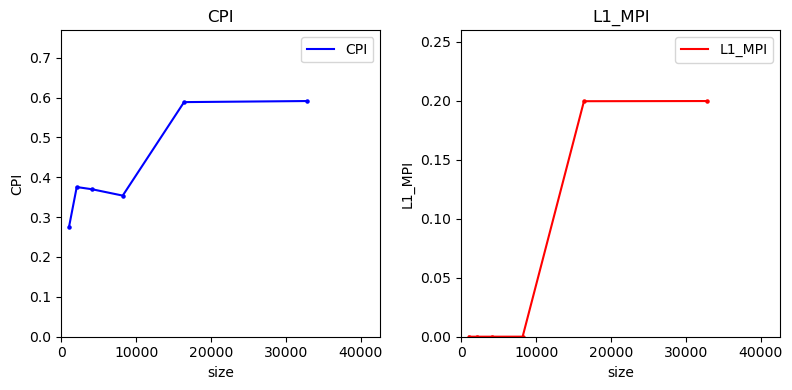

In [14]:

stride_data_calc = PE_calc(stride_data.as_df())
display(stride_data_calc)
plotPE(df=stride_data_calc,lines=True, what=[ ('size', 'CPI'), ("size", 'L1_MPI')])

<div class="question completeness">

#### How well do your predictions match the results?

<div class="answer">
My predictions were very similar to the actual results. For size 1024 and 4096, there should be very few cache misses overall, while for size 16384, this gets over the size of our cache so we will see many cache misses each iteration of the loop. There is still some error, since my prediction did not account for exact locations in the cache and more just an overall amount of data going into the cache.
</div>
</div>

<div class="solution">

For small sizes, agreement is not perfect.  We predicted 64 misses at `size=1024` and 256 at `size=4096` but we got 77.  This is fine, there's other stuff going on and the L1_MPI is still very low.
    
Our prediction at `size = 16384` is much better.
    
The `size=8196` is interesting. It should exactly fit, but we have a lot more misses.  This is because there's other stuff in memory (e.g., the stack) and the tensor should just barely fit.   However, while we get ~100x more misses than at `size=4096`, `L1_MPI` is still quite low and `CPI` doesn't change significantly (in fact, for me it goes down a bit -- wierd).
    
</div>

<div class="question optional">

#### Comment out the `flush_caches()` line in the code above. What happens?  Why? 

<div class="answer">
</div>
</div>

Here's a Moneta plot of what's going on during the execution of `stride()`'s inner loops for  `size = 1024`, `size = 4096`, and `size = 16k`.

![img/example.png](img/example.png)

In the plots, compulsory misses are purple, hits are gold, and capacity misses are light blue.

The large blocks are the accesses for `size = 1024`, `size = 4096`, and `size = 16k`. 

In each block, each upward-slanting line is one iteration through the outer loop (they are blurred together for 1024).  As you can see, when the region of memory is larger than the cache, the whole block turns blue instead of gold.

Let's try another experiment and increase the stride by 4x to 64 element (256 bytes) while using `1024`, `4096`, and `16384` for `size`.

# Working Sets

In lecture, you heard about the "working set" of an application, and the notion of a working set is deeply tied to temporal locality.
The working set is the _portion of memory that the program is currently using_.  The connection between working sets and temporal locality lies in the word "currently" since that refers to a period of time.  In essence, the working set is the set of cache lines that a program accesses repeatedly over a period of time.

One thing to note:  Without reuse, there can be no temporal locality.  A single access to a cache line has no temporal locality.

Generally speaking, there will be fewer cache misses (and performance will be faster) if the working set fits in the L1 cache (or failing that, in the L2 cache).

## Examining `std::set`

To illustrate how working set size influences cache behavior, we'll use the `set` container object from the C++ standard template library.  Internally, `set` is implemented as a red-black binary tree.  The code below creates an `std::set` and then fills it with 4096 pseudo-random (and non-repeating) `uint64_t` values using `insert()` and then performs a bunch of queries with `find()`.

In [ ]:

cpp_set = build(code(r"""
#include"pin_tags.h"
#include"cfiddle.hpp"
#include<set>
#include<cstdint>

extern "C"
void working(uint64_t size) {
    auto s = new std::set<uint64_t>();
    uint64_t seed = 1;

    TAG_START("build", (void*)-1, 0, true);
    for(uint x = 0; x < size; x++) {
        auto t = fast_rand(&seed);
        s->insert(t);
        auto a = s->find(t);
        TAG_GROW("build",  &(*a), &(*a)+ 1);
    }
    TAG_STOP("build");
    
    seed = 1;
    start_measurement();
    TAG_START("search", (void*)-1, 0, true);
    for(uint x = 0; x < size; x++) {
        auto a = s->find(fast_rand(&seed));
        TAG_GROW("search", &(*a), &(*a)+ 1);
    }
    TAG_STOP("search");
    end_measurement();

    TAG_START_ALL("delete", false);
    delete s;
    TAG_STOP("delete");
}
"""))
cpp_set[0].source("working")

Here's what the memory trace looks like

![image.png](img/Q6.png)

What you are looking at is the region of the heap that the C++ standard library is allocating to hold the set.  Since, it's a tree-based structure, it's made up of many small objects that get allocated with `new`.  The heap is allocating space starting at a low address and working upward -- hence the diagonal.

The color key is:

* Compulsory misses are light blue
* Hits are purple.
* Conflict misses are gold.


<div class="question completeness">
    
<div class="question-text">
    
Approximately how many bytes does the `set` occupy?  What's the ratio of bytes occupied to the number of values the `set` contains?  How many bytes would be needed to store the same elements in an array?  What is the light blue line along the top slope of the triangle?
    
</div>

<div class="answer"
    
**Bytes for the `set`:** 200000
    
**Bytes per element in the `set`:** 200000/4096 = 48.8
    
**Bytes to store elements:** 8 * 4096 = 32768
    
**What is the blue line?:** The blue line is the amount of compulsory misses that cannot be avoided no matter what the cache is
     
</div>
</div>

<div class="solution">

**Bytes for the `set`**:  You can  "eyeball" it from the y-axis.  It's about 195kB
    
**Bytes per element in the `set`:**  The code inserts 4096 elements, so that's about `195000/4096 = 47.6`.  Which is really inefficient in terms of space!  If you ever need to store very large sets of integers, you might want to consider a different data structure.
    
**Bytes to store elements in array?:** Much less than this set is using: `4096 * 8 = 16384`.
    
**What is the blue line?:** The blue line is compulsory misses, so the cache can't help us there.  The fall on a nice line because each access to newly-allocated memory is a compulsory miss.
    
</div>

In the code, we created two tag: `build` and `search`.  The graph shows both of them.  `Build` is the big triangle.  `search` is the rectangle on the right that's a little darker yellow.


Also, recall that the green line on the vertical axis is the size of the cache that Moneta is modeling.

<div class="question correctness points-2">
    
<div class="question-text">
    
At the beginning of the build portion of the experiment what is miss rate?  When does it start to climb?  Why?

</div>
    
<div class="answer">
    
**Miss rate at the beginning?:** close to 0%
    
**When does it start to rise?:** Right from the start of the build portion of the experiment
    
**Why does it climb?:** We are adding more new elements to the set, so the chances of a conflict miss increase in proportion to the number of elements in the set.
    
</div>
</div>

<div class="question completeness">
    
<div class="question-text">
    
Where are hits more concentrated on the graph?  What part of the data structure do you think they are accessing (think carefully about how `std::set` is implemented and accessed)?

</div>    
<div class="answer">
    
**Where are they concentrated?:** There are more hits near the bottom of the graph because there are fewer elements in the set at this point.
    
**What part of the data structure are they accessing?  Be as specific as you can.:** They are accessing the part of the data structure that is higher up the tree (closer to the root). These elements are accessed more frequently than parts of the tree farther away from the root. Since the set is represented as a red-black tree, the tree is very close to being balanced and therefore each time a new element is accessed, we will traverse multiple nodes that are already in the cache.
        
</div>
</div>

<div class="solution">

**Where are hits concentrated?:**  They are generally more hits near the bottom of the graph.  There's also an interesting strip of purple right under the compulsory misses during `build`.
    
**What part of the data structure are hits accessing?:**  These areas of memory correspond to the part of the tree closest to the root.  They are the "hottest" part of the tree because they are accessed very frequently:  Every insertion or query touches the root node, half of the queries touch each of the roots children, 1/4 of the queries touch each of the roots grand-children, etc.  
  
We know that each node in tree takes about 48 bytes, so the cache can hold about `32k /48 = 682` nodes.  That corresponds to the `log2(682) = 9.4` layers of a perfectly balanced binary tree (Red-black trees are not perfectly balanced, but they are pretty balanced).

Each time we query the red black tree, the code traverses about  12 levels of the tree.   However, about 9 of them will be in the cache, something like 75% of accesses should hit in the cache.   If we doubled the size of the tree to 8192 nodes, the depth only increases by one, so the hit rate will go from `9/12 = 75%` to `9/13 = 69%`.
    
In your earlier classes you learned about how trees are good for performance because they have logarithmic complexity for insertion and deletion.  That's great, but their structure also provide a high degree of temporal locality because the nodes near the root are accessed so frequently.  This property is widely exploited in many different data storage systems.  For instance, databases typically store very large indexes in a tree with nodes near the root in memory (where they will be accessed quickly and frequently) and the leaves on disk (where access is slow but infrequent).
    
Due to some limitations of x86 performance counters, we can't measure miss rate directly.  We can measure the number of misses per query in the tree:
    
</div>

In [ ]:

cpp_set_run = run(cpp_set, "working", arg_map(size=exp_range(2, 65536, 2)),
                  perf_counters=["L1-DCACHE-LOAD-MISSES",  "PERF_COUNT_HW_INSTRUCTIONS","PERF_COUNT_HW_CPU_CYCLES"])

In [ ]:

cpp_set_data= PE_calc(cpp_set_run.as_df())
cpp_set_data['miss_per_lookup'] = cpp_set_data["L1_cache_misses"]/cpp_set_data["size"]
cpp_set_data['IC_per_lookup'] = cpp_set_data["IC"]/cpp_set_data["size"]
display(cpp_set_data)

<div class="_solution">

So it seems that each time the size of the tree doubles (above 1024 entries), it takes an additional 2 caches misses and additional ~100 instructions.

Why does the number of misses start growing at 1024?  Thinking about how many bytes the tree uses to store an integer and the size of the cache.
</div>


# The Three C's

Recall from lecture (or review the slides) that we can classify cache misses into three  types (known as "The Three C's"):

1.  **Compulsory**: These misses occur because the processor has not accessed this cache line before.

2.  **Capacity**: These occur because the program is accessing more memory than the cache can hold (i.e., it's working set is bigger than the cache).

3.  **Conflict**: These occur because a given cache line of memory can only live in one of the associative sets of the cache.

## Capacity and Compulsory Misses

Our investigation of spatial locality, temporal locality, and working sets illustrates compulsory and capacity misses.

<div class="question completeness">
    
<div class="question-text">
    
Look back over the Moneta graphs in previous sections of this lab and grab screen captures of the parts of the graphs that illustrate compulsory and capacity misses.  Paste them below and describe why the illustrate each kind of miss.
</div>
    
<div class="answer">
    
**Compulsory** All of the misses the first time through the loop are compulsory misses since we have not accessed these elements yet.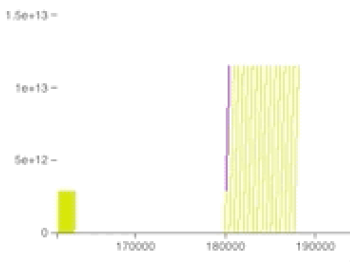
    
**Capacity** All of the misses later on in subsequent iterations of the loop are capacity misses because we have accessed them, but our cache was not large enough to hold all of them.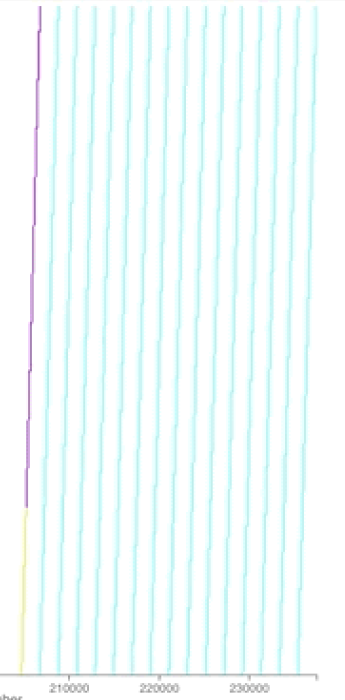
    
</div>
</div>

<div class="solution">

**Compulsory** The misses that occur in the first time through the inner loop of `stride()` are all compulsory misses.

![image.png](img/compulsory.png)

</div>

<div class="_solution">

**Capacity** In the same experiment, we saw that when the number of cachelines accessed exceeds the number of cache lines in the cache, we get many misses.  The parts highlighted in purple are all capacity misses:
    
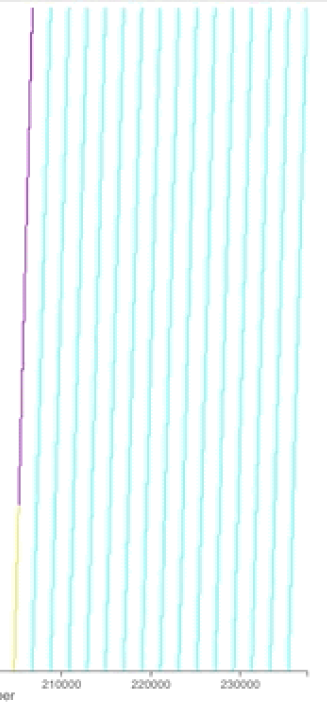   
</div>

## Conflict Misses

Let's try to produce some conflict misses.  In the last lab, we used a miss machine to generate lots of misses.  They were mostly capacity misses (i.e., we accessed too many cache lines), and the miss machine let us produce lots of seemingly random accesses really fast.  For conflict misses, we need something different:  Highly-organized misses placed precisely.

The necessary ingredient for lots of conflict misses is many memory accesses that will map to the same associative set in the cache.  If we access many of these cache lines, the associative set will "overflow" and that will causes misses.

<div class="question completeness">

<div class="question-text">
    
Assume our 32kB cache with 64-byte lines and 8-way associativity and 64-bit addresses.  Given an address $A$, how can we compute a new address, $B$, that will map to the same associative set but is not part of the same cache line as $A$?  Given an index, $i$, into an array, how can we compute the index of another element, $j$, that will conflict with the first?

</div>
<div class="answer">

**How do you compute `B`?** B needs same index as A but different tag. So we can add 2^12 = 4096 to increase the tag by 1 while keeping index and offset the same.

**How do you compute `j`?** the index j is offset by the same amount as B and since we are dealing with 4 byte ints, the index is i + 4096/4 = i + 1024

</div>
</div>

<div class="solution">

From our earlier discussion, we know we have:
    
1.  `log2(64) = 6` offset bits.
2.  `32kB/64B = 512` cache lines.
3.  `512/8 = 64` associative sets.
4.  `log2(64) = 6` index bits.
5.  `64-6-6 = 52` tag bits.

We also know that two addresses are in the same cache line if their `tag` and `index` bits match and that they map to the same associative set if they have the same `index`.  So, we need $B$ to have the same `index` but a different tag.  The first tag bit is in position `offset bits + index bits = 12`, so adding $2^{12} = 4096$  to $A$ will give $B$ a different `tag` and an identical `index`, which is just what we needed!

Computing the index of a conflicting element is easy:  We just divide $2^{12}$ by the size of the elements of the array.  For `uint32_t`, we get $2^{12}/4 = 1024$, so $j = i + 1024$.

</div>

Let's see if your formula worked.  We'll run `stride()` from earlier with a stride of 16 and 1024.  In the experiment below we set `size` so that we cover 64 strides worth of the memory, since both strides are larger than cache line, each execution of the loop will touch 64 cache lines.

In [15]:

display(stride[0].source("stride"))

conflict_run = run(stride, "stride", arg_map(size=16*64, stride_size=16, reps=1000),
                  perf_counters=["L1-DCACHE-LOAD-MISSES",  "PERF_COUNT_HW_INSTRUCTIONS","PERF_COUNT_HW_CPU_CYCLES"])
conflict_run2 = run(stride, "stride", arg_map(size=1024*64, stride_size=1024, reps=1000),
                   perf_counters=["L1-DCACHE-LOAD-MISSES",  "PERF_COUNT_HW_INSTRUCTIONS","PERF_COUNT_HW_CPU_CYCLES"])

void stride(uint size, uint64_t stride_size, uint reps) {
    tensor_t<uint32_t> t(size,1,1,1);
    flush_caches();
    start_measurement();
    for(uint k = 0; k < reps; k++) {
        for(uint i = 0; i < stride_size; i++) {
            for(uint x = 0; x < size; x += stride_size) {
                t.get(x,0,0,0) = x;
            }
        }    
    }
    end_measurement();
}

You are submitting a job for lab "Lab 4: Caches II" (caches2).
Creating job c31388d5-291b-47a5-bfbb-e3237b7c5416 0.00 0.00
Ready for submission. 2.31 2.31
Job c31388d5-291b-47a5-bfbb-e3237b7c5416 is in state 'PUBLISHED'. 2.03 4.34 
Job c31388d5-291b-47a5-bfbb-e3237b7c5416 is in state 'RUNNING'. 1.05 5.38... 
Job c31388d5-291b-47a5-bfbb-e3237b7c5416 is in state 'DONE_RUNNING'. 4.19 9.58.. 
Job c31388d5-291b-47a5-bfbb-e3237b7c5416 succeeded. 3.13 12.71Writing results 1.00 13.71
  0%|          | 0/1 [00:00<?, ?it/s]
Updated these files: ./.cfiddle/builds/build/434836f6afc564d39113df5ff9b914bd_94303a76bace6aa1d56bb0659aa607e8/94303a76bace6aa1d56bb0659aa607e8.cpp.stride(1024, 16, 1000).csv
./.cfiddle/builds/results.pickle
Job Complete 0.31 14.02
You are submitting a job for lab "Lab 4: Caches II" (caches2).
Creating job c0d35cb7-164b-4b46-b3de-1f3b82f6b84d 0.00 0.00
Ready for submission. 2.35 2.35
Job c0d35cb7-164b-4b46-b3de-1f3b82f6b84d is in state 'PUBLISHED'. 3.33 5.67 
Job c0d35cb7-164b

In [16]:

conflict_data = PE_calc((conflict_run + conflict_run2).as_df())
display(conflict_data)

,function,stride_size,OPTIMIZE,size,requestedMHz,reps,realMHz,cycles,IC,CPI,CT,ET,L1_cache_misses,L1_MPI
0,stride,16,-O1,1024,3500,1000,3416.744889,1437797,5238227,0.274482,2.926762e-10,0.000421,68,0.000013
1,stride,1024,-O1,65536,3500,1000,3485.459038,647580862,334854418,1.933918,2.869063e-10,0.185795,65711601,0.196239


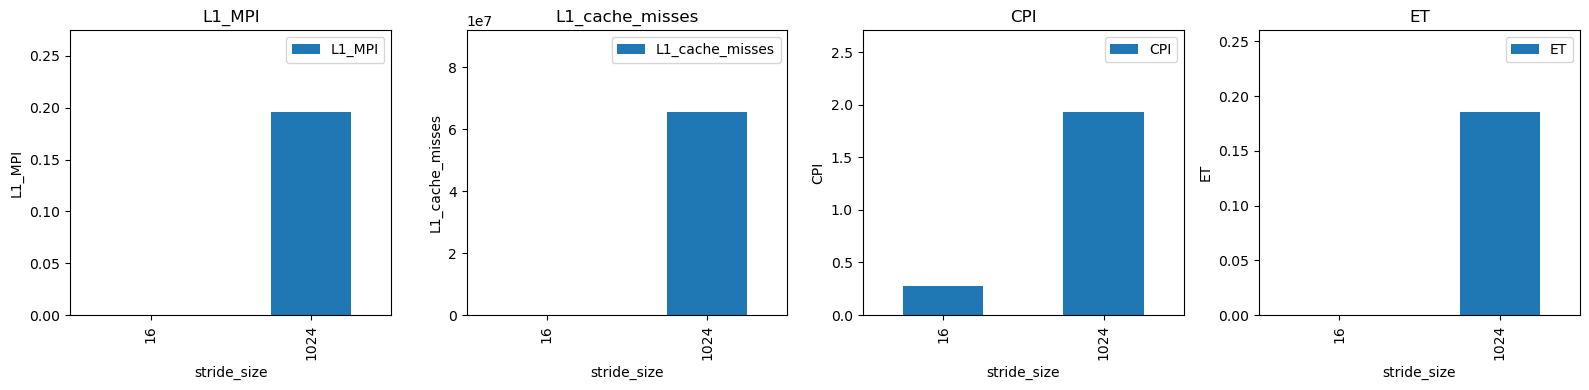

In [17]:

plotPEBar(df=conflict_data, what=[("stride_size", "L1_MPI"),("stride_size", "L1_cache_misses"), ("stride_size", "CPI"), ("stride_size", "ET")])

That worked pretty well!:  We got a lot more L1 cache misses.

<div class="question completeness">
    
<div class="question-text">
    
Based on the analysis above, what do you think will happen if the stride is one cache line longer (1040 bytes) or or one cache line shorter (1008 bytes)?  Why?
    
</div>
    
<div class="answer">
    
**Stride 1008:** This will cause the bits corresponding to the index to change which will cause fewer cache misses
    
**Stride 1040:** This will cause the bits corresponding to the offset to change which will not change the number of cache misses
    
</div>
    
</div>

<div class="solution">

In the analysis analysis above, we chose 1024 because it was $2^{12}/\mathrm{sizeof(uint32\_t)}$, and we choose $2^{12}$ because that stride size would change the tag bits without changing the index bits.  And this, in turn, would cause all the cache lines to fall in a single associative set.  A look at the binary representation of $2^{12}$ shows with this is true: `1 0000 0000 0000b`. (the `b` means binary).  Since there are no 1's in low order bits, adding $2^{12}$ won't change the index or offset.
    
For stride 1040 in an array of `uint32_t`, the number of bytes in stride is 4160:  Let's look at 4160 in binary: `1 0000 0100 0000b`.  It has 1 down there, so adding it _will_ change the index.  So, the cache lines _will not_ fall into a single associative set.  Hence, cache misses should much lower.
   
Let's see what happens:
</div>


In [ ]:

stride_1008 = run(stride, "stride", arg_map(size=1025*64, stride_size=1008, reps=1000),
                  perf_counters=["L1-DCACHE-LOAD-MISSES",  "PERF_COUNT_HW_INSTRUCTIONS","PERF_COUNT_HW_CPU_CYCLES"])
stride_1040 = run(stride, "stride", arg_map(size=1023*64, stride_size=1040, reps=1000),
                   perf_counters=["L1-DCACHE-LOAD-MISSES",  "PERF_COUNT_HW_INSTRUCTIONS","PERF_COUNT_HW_CPU_CYCLES"])

In [ ]:
conflict_data = PE_calc((conflict_run + conflict_run2 + stride_1008 + stride_1040).as_df())
display(conflict_data)
plotPEBar(df=conflict_data, what=[("stride_size", "L1_MPI"),("stride_size", "L1_cache_misses"), ("stride_size", "CPI"), ("stride_size", "ET")])

<div class="_solution">
    
The number of misses per instruction is almost identical to the stride-16 case!
    
</div>

The main lesson here is that conflict misses are largely a product of bad luck if the working set is smaller than the cache:  It may happen that for a particular cache capacity, associativity, and line size, that many cache lines in the application's working set happen to map to the same associative set.

Fortunately, in modern processors caches are pretty highly-associative (ours is 8-way) and at that level of associativity conflict misses are not a huge problem.  If your working set is smaller than your cache's capacity, you'd have to be very unlucky to have enough cache lines land in the same associative set to cause many conflict misses.  If your working set is larger than your cache, you're going to have misses regardless.  As the example above shows, it is not hard to construct programs with small working sets that are unlucky.  We have a term for these access patterns:  We say they are "pathological".

By definition, pathological access patterns are rare, so we don't spend too much time worrying about them.  But they can crop up and it's a good idea to be aware of the possibility.

<div class="question optional">

<div class="question-text">

Consider the implementation of `tensor_t` described earlier in the lab.  Accessing a tensor column-wise produces strided accesses which could lead to conflict misses if the dimensions of the tensor are "unlucky".  Why is this so?  What constitutes "unlucky" dimensions?  How could you modify `tensor_t` to make it (mostly) immune to "unlucky" dimensions?
    
</div>
</div>

# The L2 and L3 Caches

So far in these two labs, we have focused on the L1 cache, but our machine also has L2 and L3 caches.  Here's how they are organized:

![image.png](img/cacheorg.png)

As a reminder, the L1 is 32kB, 8-way set associative, with 64-byte lines.  So, there are 512 cache lines divided into 64 associative sets.

The L1 and L2 are private to each core while the L3 is shared among all the cores on the CPU.  The L2 is 256kB and is 8-way set associative.  The L3 is 2MB per core, but it's shared across all the cores.  Our machine has six cores, so 12MB.

On our machine, the L3 is the "last level cache" or LLC.  The LLC is the cache just before DRAM.  On some processors the LLC is the L2.

The code below is similar to the `stride` function we used in the previous lab.  The change is that the outer loop is set up so we do the same number of memory accesses for all values of `size` (This is why we divide by `size`).  Our goal is to measure the L1 and L3 MPI as size increases.  The CPU's performance counters don't let us collect L1 and L3 statistics at the same time, so we have to run the experiment once for each cache. 

Why don't we measure L2 MPI?  Well, there aren't great performance counters for the L2 on our machine.

<div class="question completeness">
    
<div class="question-text">
    
As `size` increases, the miss rate for the L1 and L3 will rise.  At what value of `size` would you expect to see significant increases in L1 and L3 MPI?
</div>
    
<div class="answer">

**L1 critical `size`:** 32kB

**L3 critical `size`:** 2MB
    
</div>
</div>

Let's see how we do:

In [18]:

L13 = build(code(r"""
#include"cfiddle.hpp"
#include"tensor_t.hpp"
#include<cstdint>

extern "C"
void L13(uint64_t size, uint64_t stride_size) {
    tensor_t<uint32_t> t(size,1,1,1);
    start_measurement();
    for(uint64_t i = 0; i < (1 << 27)/size; i++) {
        for(uint x = 0; x < size; x+=stride_size) {
            t.get(x,0,0,0) = 0;
        }
    }
    end_measurement();
}

"""), arg_map(OPTIMIZE="-O1"))

L1 = run(L13, "L13", arg_map(size=exp_range(16,1024*1024*128,2), stride_size=16), 
         perf_counters=["L1-DCACHE-LOAD-MISSES",  "PERF_COUNT_HW_INSTRUCTIONS","PERF_COUNT_HW_CPU_CYCLES"])

L3 = run(L13, "L13", arg_map(size=exp_range(16,1024*1024*128,2), stride_size=16),
             perf_counters=["LLC-LOAD-MISSES",  "LLC-STORE-MISSES", "PERF_COUNT_HW_INSTRUCTIONS","PERF_COUNT_HW_CPU_CYCLES"])

  0%|          | 0/1 [00:00<?, ?it/s]

You are submitting a job for lab "Lab 4: Caches II" (caches2).
Creating job e0131f8c-376e-4253-a72b-574ff337fb2f 0.00 0.00
Ready for submission. 2.50 2.50
Job e0131f8c-376e-4253-a72b-574ff337fb2f is in state 'PUBLISHED'. 2.48 4.98 
Job e0131f8c-376e-4253-a72b-574ff337fb2f is in state 'RUNNING'. 1.04 6.02... 
Job e0131f8c-376e-4253-a72b-574ff337fb2f is in state 'DONE_RUNNING'. 4.22 10.25... 
Job e0131f8c-376e-4253-a72b-574ff337fb2f succeeded. 4.18 14.43Writing results 1.00 15.43
  0%|          | 0/24 [00:00<?, ?it/s]
Updated these files: ./.cfiddle/builds/build/c0ae375bcee00798549e5d2c0a710ef1_73969ac9662b59b44b789c77f6d40a2f/73969ac9662b59b44b789c77f6d40a2f.cpp.L13(1024, 16).csv
./.cfiddle/builds/build/c0ae375bcee00798549e5d2c0a710ef1_73969ac9662b59b44b789c77f6d40a2f/73969ac9662b59b44b789c77f6d40a2f.cpp.L13(1048576, 16).csv
./.cfiddle/builds/build/c0ae375bcee00798549e5d2c0a710ef1_73969ac9662b59b44b789c77f6d40a2f/73969ac9662b59b44b789c77f6d40a2f.cpp.L13(128, 16).csv
./.cfiddle/builds/bu

,function,stride_size,OPTIMIZE,size,requestedMHz,realMHz,cycles,IC,CPI,CT,ET,L1_cache_misses,L1_MPI
0,L13,16,-O1,16,3500,3478.721531,25172029,100663535,0.250061,2.874619e-10,0.007236,22,2.185498e-07
1,L13,16,-O1,32,3500,3481.144297,19858675,75497709,0.263037,2.872619e-10,0.005705,15,1.986815e-07
2,L13,16,-O1,64,3500,3478.155996,18879709,62914797,0.300084,2.875087e-10,0.005428,23,3.655738e-07
3,L13,16,-O1,128,3500,3481.006471,18081009,56623340,0.319321,2.872732e-10,0.005194,43,7.594042e-07
4,L13,16,-O1,256,3500,3478.345194,17669124,53477613,0.330402,2.874930e-10,0.005080,44,8.227742e-07
5,L13,16,-O1,512,3500,3479.283563,17444084,51904748,0.336079,2.874155e-10,0.005014,57,1.098165e-06
6,L13,16,-O1,1024,3500,3477.972626,17474830,51118316,0.341851,2.875238e-10,0.005024,92,1.799746e-06
7,L13,16,-O1,2048,3500,3478.265710,18212721,50725100,0.359048,2.874996e-10,0.005236,165,3.252827e-06
8,L13,16,-O1,4096,3500,3481.317438,17416126,50528492,0.344679,2.872476e-10,0.005003,270,5.343520e-06
9,L13,16,-O1,8192,3500,3480.386681,17099453,50430188,0.339072,2.873244e-10,0.004913,3065,6.077709e-05


,function,stride_size,OPTIMIZE,size,requestedMHz,realMHz,cycles,IC,CPI,CT,ET,L3_cache_misses,L3_MPI
0,L13,16,-O1,16,3500,3481.271886,25171406,100663534,0.250055,2.872513e-10,0.007231,0,0.000000e+00
1,L13,16,-O1,32,3500,3480.680273,19858534,75497709,0.263035,2.873002e-10,0.005705,0,0.000000e+00
2,L13,16,-O1,64,3500,3481.335391,18878690,62914796,0.300068,2.872461e-10,0.005423,0,0.000000e+00
3,L13,16,-O1,128,3500,3481.299215,17830205,56623340,0.314891,2.872491e-10,0.005122,0,0.000000e+00
4,L13,16,-O1,256,3500,3478.478972,17306546,53477612,0.323622,2.874820e-10,0.004975,0,0.000000e+00
5,L13,16,-O1,512,3500,3477.598818,17044303,51904748,0.328377,2.875547e-10,0.004901,0,0.000000e+00
6,L13,16,-O1,1024,3500,3480.934524,16912921,51118316,0.330858,2.872792e-10,0.004859,0,0.000000e+00
7,L13,16,-O1,2048,3500,3481.241357,18050689,50725100,0.355853,2.872539e-10,0.005185,0,0.000000e+00
8,L13,16,-O1,4096,3500,3479.109600,17415866,50528492,0.344674,2.874299e-10,0.005006,0,0.000000e+00
9,L13,16,-O1,8192,3500,3478.419133,17102239,50430188,0.339127,2.874869e-10,0.004917,0,0.000000e+00


/opt/conda/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/opt/conda/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


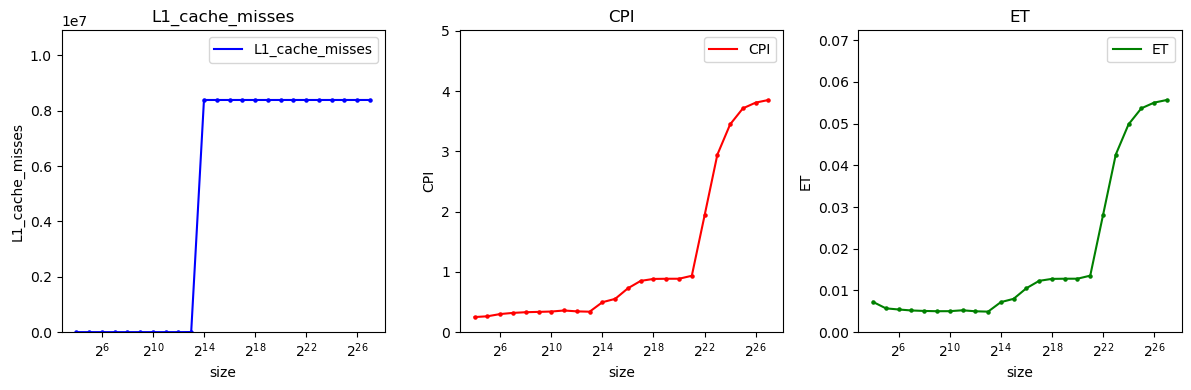

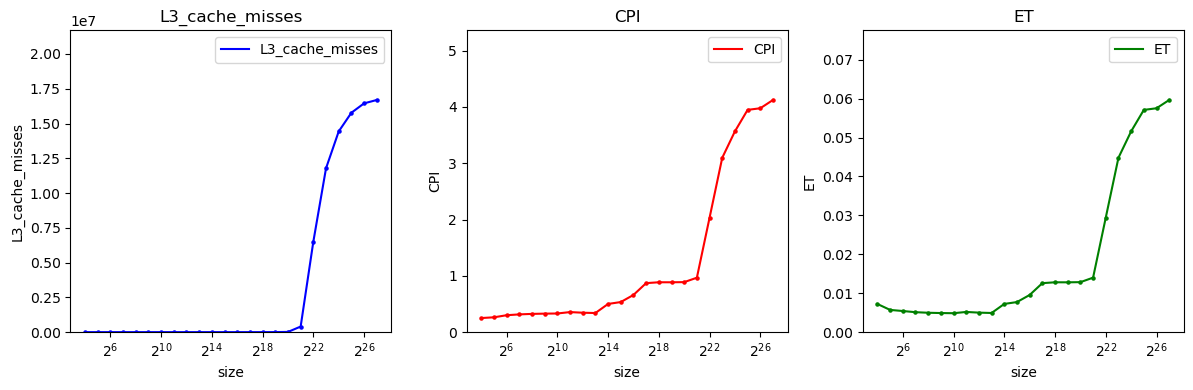

In [19]:

display(PE_calc(L1.as_df()))
display(PE_calc(L3.as_df()))
plotPE(df=PE_calc(L1.as_df()), what=[("size", "L1_cache_misses"), ("size", "CPI"), ("size", "ET")], lines=True, logx=2)
plotPE(df=PE_calc(L3.as_df()), what=[("size", "L3_cache_misses"), ("size", "CPI"), ("size", "ET")], lines=True, logx=2)

<div class="question completeness">
    
<div class="question-text">
    
Do the data match your prediction?   If not, how did it differ?
    
</div>
    
<div class="answer">

**L1 prediction correct?:** No, there is a significant increase at 16kB instead of at 32kB

**L3 prediction correct?:** No, there is a significant increase at 128kB instead of at 2MB
    
</div>
</div>

The graphs also include CPI, which should, in theory, be the same since we just ran the same code twice with different performance counters.  You can see the small increase when the L1 hit increases, and the larger bump with misses in the L3.

<div class="question correctness points-2">
    
#### Based on this data, how much speedup could you expect from reducing your working set size (in bytes) from...
    
<div class="answer">

**8MB to 4MB?:** speedup = 0.044809 / 0.029420 = 1.523

**2MB to 512kB?:** speedup = 0.013994 / 0.012797 = 1.094
    
**2MB to 128kB?:** speedup = 0.013994 / 0.012582 = 1.112

**128MB to 32kB?:** speedup = 0.059647 / 0.007724 = 7.722
    

</div>
</div>

# The TLB

The three levels of on-chip caches set the number of _cache lines_ the processor can quickly access.  As you heard in 142, though, there is another kind of cache in the processor:  the TLB.   Instead of data, the TLB caches the translations from virtual addresses to physical addresses, and its size sets the number of _pages_ your program can access quickly.

Here's what our processor has:

1. 64 entries for 4kB pages (256kB total)
2. An L2 TLB with 1024 entries (8-way set associative; 4MBs total @ 4kB pages).
3. 32 entries for 2MB pages (64MB total).
4. 4 entries for 1GB pages (4GB total).

This is a little more complicated than what you heard about in 142.  First off, there is an L1 TLB _and_ an L2 TLB.  If we think of the L1 TLB as cache for memory translations, then the L2 TLB is exactly analogous to the L2 cache:  If the processor has a TLB miss in the L1 TLB, it can look in the L2 TLB.  One important point:  memory address translation _always_ happens at the L1 cache because _all_ the caches are physically tagged.  This means that the L2 TLB _has nothing to do with the L2 Cache_.  

The L2 TLB can cover 4MBs worth of 4kB pages of virtual address space.  If you are using more pages than that, you'll get TLB misses and your performance will suffer. 

Here's a fun idea!:  Let's use a miss machine to measure the L1 TLB miss latency.

The code below is a version of our miss machine from the last lab but with a few changes:

1.  It has a template-configurable link size (`BYTES`).
2.  We allocate the `MM` links in array that 4096-byte aligned.
3.  We use [`madvise()`](https://man7.org/linux/man-pages/man2/madvise.2.html) to prevent us from using 2MB pages, which Linux will automatically use when it can.  We'll come back to that.
4.  We can set the _total size_ of the miss machine _in bytes_ with the `size` parameter.  It should be a multiple of `BYTES`.

Read through the code to make sure it makes sense.

In [51]:
tlb = build("TLB.cpp", arg_map(OPTIMIZE="-O1"))
tlb[0].source(show=("//START", "//END"))

  0%|          | 0/1 [00:00<?, ?it/s]

//START
#include<cstdint>
#include<cstdlib>
#include<vector>
#include<algorithm>
#include"cfiddle.hpp"
#include<iostream>
#include <sys/mman.h>
#include<cstring>

template<size_t BYTES>
struct MM {
    struct MM* next;  // I know that pointers are 8 bytes on this machine.
    uint64_t junk[BYTES/8 - 1]; // This forces the struct MM to take a up a whole cache line, abolishing spatial locality.
};


template<class MM>
MM *  __attribute__ ((noinline))  miss(MM * start, uint64_t access_count)  {
    for(uint64_t i = 0; i < access_count; i++) { // Here's the loop that does this misses. It's very simple.
        start = start->next;
    }
    return start;
}

template<size_t BYTES>
uint64_t* TLB(uint64_t size, uint64_t access_count) {
    struct MM<BYTES> * array = NULL;
    int r =  posix_memalign(reinterpret_cast<void**>(&array), 4096, size);
	if (r == -1) { 
		std::cerr << "posix_memalign() failed.  Exiting: " << strerror(errno) << "\n";
		exit(1);
    }

    r = madvise(reinterpret_cast<void*>(array), size, MADV_NOHUGEPAGE);
	if (r == -1) { 
		std::cerr << "madvise() failed.  Exiting: " << strerror(errno) << "\n";
		exit(1);
    }
    
    std::cout << "array alignment is " << (reinterpret_cast<uintptr_t>(array) % 4096) << "\n";
    std::cout << "array size is " << size/BYTES << " element; " << size << "B\n";
    
    // This is clever part  'index' is going to determine where the pointers go.  We fill it consecutive integers.
    std::vector<uint64_t> index;
    for(uint64_t i = 0; i < size/BYTES; i++) {
        index.push_back(i);
    }
    // Randomize the list of indexes.
    std::random_shuffle(index.begin(), index.end());

    // Convert the indexes into pointers.
    for(uint64_t i = 0; i < size/BYTES; i++) {
        array[index[i]].next = &array[index[(i + 1) % (size/BYTES)]]; 
    } 

    MM<BYTES> * start = &array[0];
    start_measurement();
    start = miss(start, access_count);
    end_measurement();
    return reinterpret_cast<uint64_t*>(start); // This is a garbage value, but if we don't return it, the compiler will optimize out the call to miss.
} 
//END

There are two parameters we need to set:  The size of `MM` (`BYTES` in the code above) and the `size`.
 
Here's what the `miss()` function looks like for `BYTES = 4096`.  It should be familiar from Lab 3 (note that we have use the mangled name):

Cannot determine entrypoint, using 0x000013e0.


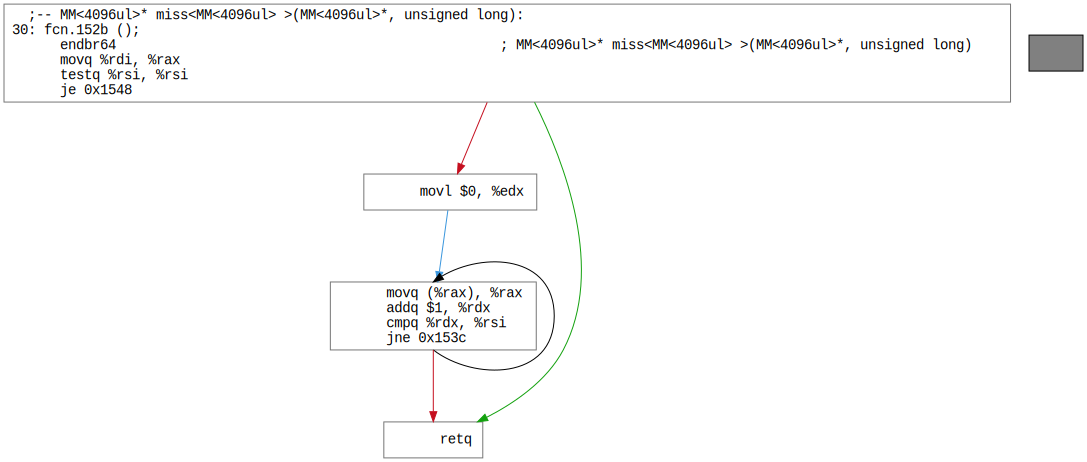

In [21]:
tlb[0].cfg("MM_4096ul__miss_MM_4096ul____MM_4096ul___unsigned_long_")

<div class="question completeness">
    
<div class="question-text">
    
Using the code above, what values of `BYTES` and `size` should we run the miss machine with to measure the L1-TLB miss latency?  (The fact that there are two experiments listed is a hint that you'll need to run two different experiments.)
    
</div>
   
<div class="answer">

|| `BYTES` | `size` |
|--|------------|--|
|Experiment 1| 8 | 4096 |
|Experiment 2| 4160 | 2048000 |
    
</div>
</div>

<div class="solution">

We are trying to measure the L1 TLB miss latency.  What is that exactly?  It's the difference in latency between an L1 cache hit that hits in the TLB and an L1 cache hit that misses in the TLB.  We want the accesses to be cache _hits_ because otherwise, our measurement might include the L1 cache miss latency as well.
    
So, we need to take two measurements.  For the first, we want to ensure that there are no TLB misses and no L1 cache misses.  For the second measurement, we would like there to be many TLB misses and no L1 cache misses.
    
**No L1-TLB misses/No L1 cache misses:**  Pretty easy.  We could make `MM` occupy 8 bytes and set `size` to 8B.   This would create a miss machine with a single link, which would result in no misses of any kind.  We could also set `size = 4096` (or actually any thing less than 32kB) and the effect would be the same.
    
**Many L1 TLB misses/No L1 cache misses** This is trickier:  We need to spread our accesses across many more than 64 4kB pages (to have lots of TLB misses) but we need to access no more than 512 cache lines (so they will all fit in the L1 cache).  Fortunately, 512 is much larger than 64, so we can access one cache line in each of 512 pages.
    
A good first try would be to set `size` to 512*4kB and `BYTES` to 4096.  That way, each `MM` will occupy one page.  Let's try that!
    
The code below will invoke `TLB_4096` with `size = 4096` (1 page) and `size = 512*4096` (512 pages).  Here's the code for `TLB_4096`:
    

In [52]:
tlb[0].source("TLB_4096")

extern "C" void TLB_4096(uint64_t size, uint64_t access_count) {
        TLB<4096>(size, access_count);
}

In [23]:

TLB1 = run(tlb, "TLB_4096", arg_map(size=[4096, 512*4096], access_count=128*1024*1024),
           perf_counters=["L1-DCACHE-LOAD-MISSES",  "PERF_COUNT_HW_INSTRUCTIONS","PERF_COUNT_HW_CPU_CYCLES"])
TLB1_data = PE_calc(TLB1.as_df())
           
TLB1_data["load_latency_cyc"] = TLB1_data["cycles"]/TLB1_data["access_count"]
TLB1_data["load_latency_ns"] = TLB1_data["load_latency_cyc"]*TLB1_data['CT']*1e9
display(TLB1_data)

You are submitting a job for lab "Lab 4: Caches II" (caches2).
Creating job 880924c6-afaa-4c32-a930-17e88f559692 0.00 0.00
Ready for submission. 2.59 2.59
Job 880924c6-afaa-4c32-a930-17e88f559692 is in state 'PUBLISHED'. 1.77 4.37 
Job 880924c6-afaa-4c32-a930-17e88f559692 is in state 'RUNNING'. 1.04 5.41..... 
Job 880924c6-afaa-4c32-a930-17e88f559692 is in state 'DONE_RUNNING'. 6.26 11.66... 
Job 880924c6-afaa-4c32-a930-17e88f559692 succeeded. 4.19 15.85Writing results 1.00 16.85
  0%|          | 0/2 [00:00<?, ?it/s]
array alignment is 0
array size is 1 element; 4096B
array alignment is 0
array size is 512 element; 2097152B
Updated these files: ./.cfiddle/builds/build/c0ae375bcee00798549e5d2c0a710ef1_TLB/TLB.cpp.TLB_4096(2097152, 134217728).csv
./.cfiddle/builds/build/c0ae375bcee00798549e5d2c0a710ef1_TLB/TLB.cpp.TLB_4096(4096, 134217728).csv
./.cfiddle/builds/results.pickle
Job Complete 0.32 17.17


,function,access_count,OPTIMIZE,size,requestedMHz,realMHz,cycles,IC,CPI,CT,ET,L1_cache_misses,L1_MPI,load_latency_cyc,load_latency_ns
0,TLB_4096,134217728,-O1,4096,3500,3485.624882,536960513,536871306,1.000166,2.868926e-10,0.15405,160,2.980230e-07,4.000668,1.147762
1,TLB_4096,134217728,-O1,2097152,3500,3484.592692,7475810315,536873322,13.924719,2.869776e-10,2.14539,134220240,2.500036e-01,55.699127,15.984401


<div class="_solution">
    
In this data, changing `size` from 4096 to 512*4096 (2,097,152) increased CPI from 1 to 13. And load latency seems to have increased by 13x to 52 cycles. But let's check our data more closely.  Did the experiments a achieve our goals?

The first line looks pretty good. Last lab we saw that L1 hit latency was 4 cycles, which is what we see in the last column.   Also, note that L1 cache misses are very low (i.e., `L1_MPI` is very low).
    
The second line, however, was supposed to have low L1 hits _and_ high TLB misses.  The `L1_MPI` is quite high: 0.25. Since there are only 4 instructions in the `miss()` loop, that means all the loads are missing in the L1.  But wait, we only have 512 links in our miss machine -- they should all fit in our cache at once!  What's going on?!?!?  Think carefully about what's going on before you read the next paragraph.


    
The problem is conflict misses:  since all the `MM` links are 4kB aligned, they fall into a small number of associative sets in the L1.  Hence, cache misses!  

To fix this, we can increase the size of `MM` by one cache line to 4160 bytes.  That will ensure that the `MM` structs are spread across all the associative sets (If this doesn't make sense, working out the cache indexes of `MM` structs of size 4096 vs 4160 should help clear it up.).  Here's the experiment:

In [24]:

TLB2 = run(tlb, "TLB_4160", arg_map(size=[4160, 512*4160], access_count=128*1024*1024),
       perf_counters=["L1-DCACHE-LOAD-MISSES",  "PERF_COUNT_HW_INSTRUCTIONS","PERF_COUNT_HW_CPU_CYCLES"])
TLB2_data = PE_calc(TLB2.as_df())
           
TLB2_data["load_latency_cyc"] = TLB2_data["cycles"]/TLB2_data["access_count"]
TLB2_data["load_latency_ns"] = TLB2_data["load_latency_cyc"]*TLB2_data['CT']*1e9
display(TLB2_data)

You are submitting a job for lab "Lab 4: Caches II" (caches2).
Creating job d21a226e-4901-4bbd-81b2-0542b43ab997 0.00 0.00
Ready for submission. 2.78 2.78
Job d21a226e-4901-4bbd-81b2-0542b43ab997 is in state 'PUBLISHED'. 1.91 4.69 
Job d21a226e-4901-4bbd-81b2-0542b43ab997 is in state 'RUNNING'. 1.04 5.73... 
Job d21a226e-4901-4bbd-81b2-0542b43ab997 is in state 'DONE_RUNNING'. 4.16 9.89... 
Job d21a226e-4901-4bbd-81b2-0542b43ab997 succeeded. 4.16 14.04Writing results 1.00 15.05
  0%|          | 0/2 [00:00<?, ?it/s]
array alignment is 0
array size is 1 element; 4160B
array alignment is 0
array size is 512 element; 2129920B
Updated these files: ./.cfiddle/builds/build/c0ae375bcee00798549e5d2c0a710ef1_TLB/TLB.cpp.TLB_4160(2129920, 134217728).csv
./.cfiddle/builds/build/c0ae375bcee00798549e5d2c0a710ef1_TLB/TLB.cpp.TLB_4160(4160, 134217728).csv
./.cfiddle/builds/results.pickle
Job Complete 0.32 15.36


,function,access_count,OPTIMIZE,size,requestedMHz,realMHz,cycles,IC,CPI,CT,ET,L1_cache_misses,L1_MPI,load_latency_cyc,load_latency_ns
0,TLB_4160,134217728,-O1,4160,3500,3486.406480,536958894,536871302,1.000163,2.868283e-10,0.154015,171,3.185121e-07,4.000656,1.147501
1,TLB_4160,134217728,-O1,2129920,3500,3485.737587,1758136324,536871664,3.274780,2.868833e-10,0.504380,1561307,2.908157e-03,13.099136,3.757924


<div class="_solution">
    
This looks better.  The first line is essentially unchanged.

The second line is much improved: `L1_MPI` is very low.

The new load latency with the L1 TLB misses is 13 cycles -- 9 more than the baseline L1 latency, so an L1 TLB misses takes 9 cycles or about 2.6 ns.

</div>

<div class="question optional">
    
<div class="question-text">

The measurement above is for a miss to the L1 TLB.  Perform a different experiment to measure the L2 TLB miss latency.  This is harder than it appears at first.
    
</div>
    
</div>
    

<div class="question optional">
    
<div class="question-text">

The measurements above are based on 4kB pages, but we can also use 2MB "huge pages".  Repeat the experiment above to determine whether 2MB TLB entries can also reside in the L2 TLB.      
</div>
 
<div class="answer">

A few notes:
    
1.  This one is a little involved.  You'll need to significantly tweak the experiments we did above.
2.  Whether 2MB TLB entries can be in the in the L2 TLB is not clearly specified in any documents I have found, so I don't know the answer.
3.  To get the system to use 2MB huge pages, remove the call to `madvise()` in `TLB.cpp` and ask `posix_memalign()` to give 2MB-aligned memory.
4.  Look in `TLB.cpp` for examples of how to change `BYTES`.  `TLB_2M()` is a good starting point.

</div>
</div>
    

# Optimizing For Locality

Minimizing cache misses is critical for maximizing performance because, as you have seen, even a small number of misses can inflate `CPI` and `ET`.  As a result, programmers who are concerned about performance often spend a lot of effort optimizing their code to reduce misses.

Below, we'll take a look a two common optimizations that aim to increase locality:  Loop reordering and tiling.  

In the compiler lab, you explored several other optimizations that compilers apply very effectively.  While there are compilers that apply these (and other) locality optimizations, many do not, and even when they do, these locality optimizations do not work as effectively when applied automatically, so performance-obsessed programmers often apply locality optimizations by hand (but, of course, only when profiling and Amdahl's law demonstrates it's potentially profitable!).

## Loop Renesting

Loop reordering or "re-nesting" is an optimization that changes the order in which loops are nested to improve locality.  For instance, consider the code below.  It initializes a 2D tensor, but it does it twice:  The first time, the loop for `x` is on the outside of the loop nest.  The second time, `x` is on the inside.

In [26]:
renest = build(code(r"""
#include"cfiddle.hpp"
#include"tensor_t.hpp"
#include"util.hpp"
#include<cstdint>

extern "C"
void x_inside(uint64_t size, uint64_t rows) {
    tensor_t<uint32_t> t(size/rows,rows,1,1);
    disable_prefetcher();
    flush_caches();
    start_measurement();
    for(uint y = 0; y < rows; y++) {
        for(uint x = 0; x < size/rows; x++) {
            t.get(x,y,0,0) = x;
        }
    }
    end_measurement();
    
}


extern "C"
void x_outside(uint64_t size, uint64_t rows) {
    tensor_t<uint32_t> t(size/rows,rows,1,1);
    disable_prefetcher();
    flush_caches();
    start_measurement();
    for(uint x = 0; x < size/rows; x++) {
        for(uint y = 0; y < rows; y++) {
            t.get(x,y,0,0) = x;
        }
    }
    end_measurement();
    
}

"""), arg_map(OPTIMIZE="-O1"))
renest[0].source()
               

  0%|          | 0/1 [00:00<?, ?it/s]

#include"cfiddle.hpp"
#include"tensor_t.hpp"
#include"util.hpp"
#include<cstdint>

extern "C"
void x_inside(uint64_t size, uint64_t rows) {
    tensor_t<uint32_t> t(size/rows,rows,1,1);
    disable_prefetcher();
    flush_caches();
    start_measurement();
    for(uint y = 0; y < rows; y++) {
        for(uint x = 0; x < size/rows; x++) {
            t.get(x,y,0,0) = x;
        }
    }
    end_measurement();
    
}


extern "C"
void x_outside(uint64_t size, uint64_t rows) {
    tensor_t<uint32_t> t(size/rows,rows,1,1);
    disable_prefetcher();
    flush_caches();
    start_measurement();
    for(uint x = 0; x < size/rows; x++) {
        for(uint y = 0; y < rows; y++) {
            t.get(x,y,0,0) = x;
        }
    }
    end_measurement();
    
}


// Cfiddle-signature=c92a3c7647aabca719020bc299f5a6a8

Here's the memory trace for `x_inside`:

![x_inside.jpg](img/x_inside.jpg)

And here it is for `x_outside()`:

![x_outside.jpg](img/x_outside.jpg)

Remarkably, those two plots contain exactly the same memory accesses, they are just distributed differently through time.

Recall from our earlier discussion of `tensor_t`, that incrementing the first argument to `get()` corresponds to moving to the next element in the underlying array of data.  In the code above, `x` is the first argument to `get()`, so putting the `x` loop inside leads to better spatial locality.

You can see this reflected in the traces more clearly if we zoom in:  With `x` on the inside, the program marches linearly through memory:

![zoom_x_inside.jpg](img/zoom_x_inside.png)

See how both the range of the horizontal and vertical axes are both quite small.  This means that the accesses close in space and time.

With the `x` loop outside, it takes large strides through the array, and accesses to the addresses are spread out over a long time (note the much larger range on both axes:

![zoom_x_outside.jpg](img/zoom_x_outside.png)


In particular, it doesn't access the same 64 byte cache line again until long after it has been evicted from the cache.

<div class="question completeness">
   
<div class="question-text">

What value of the `rows` argument to `x_outside()` should result in a very high (e.g., > 95%) hit rate?  Try to reason through the correct value before running any experiments.

</div>
    
<div class="answer">
256 rows, since there are 512 cache lines, anything smaller than 512 rows will have a low miss rate and therefore a high hit rate.

</div>

</div>

<div class="solution">
    
Recall how `tensor_t` accesses it's internal array.  For the function above, the index calculation becomes:
    
`index = y * size/rows + x;`
    
When the `x` loop is on the outside, the first iteration of the `y` loop code brings in a cache line and uses one element.  The next iteration of the `y` loop accesses an element that is `size/rows` elements away.  As long as `size/rows` represents more than 64 bytes, that location will be in a different cache line.  In the code above, each element is a `uint32_t`, so if `size/rows > 16`, the next element is in a new cache line. 
    
So, each iteration of the `y` loop touches a different cache line.  In our code, that equates to `rows` cache lines.
    
When the `y` loop is finished, `x` will increment and the `y` loop will access access the same cache lines in the same order.
    
The misses arise when `rows` is larger than the number cache lines in our cache.  Our cache is 32kB with 64-bytes lines, so it has 512 cache lines.  As a result, if `rows > 512` there will be lots of cache misses.  You can verify this by running the code above with `rows` equal to 511, 512, and 513.

The cell below runs `x_outside()` for a wide range of `rows` values.  The cell below graphs the resulting misses per instructions vs. `rows`.
</div>

In [27]:

renest_run = run(renest, function="x_outside", arguments=arg_map(size=128*16*1024,
                                                                 rows=range(512-256, 512+256,4)),
                 perf_counters=["L1-DCACHE-LOAD-MISSES",  "PERF_COUNT_HW_INSTRUCTIONS","PERF_COUNT_HW_CPU_CYCLES"])

You are submitting a job for lab "Lab 4: Caches II" (caches2).
Creating job 2d4e5616-553f-41af-960d-797be969f63e 0.00 0.00
Ready for submission. 2.49 2.49
Job 2d4e5616-553f-41af-960d-797be969f63e is in state 'PUBLISHED'. 1.49 3.97 
Job 2d4e5616-553f-41af-960d-797be969f63e is in state 'RUNNING'. 1.04 5.01...... 
Job 2d4e5616-553f-41af-960d-797be969f63e is in state 'DONE_RUNNING'. 7.36 12.37.. 
Job 2d4e5616-553f-41af-960d-797be969f63e succeeded. 3.64 16.01Writing results 1.00 17.01
  0%|          | 0/128 [00:00<?, ?it/s]
Updated these files: ./.cfiddle/builds/build/c0ae375bcee00798549e5d2c0a710ef1_c92a3c7647aabca719020bc299f5a6a8/c92a3c7647aabca719020bc299f5a6a8.cpp.x_outside(2097152, 256).csv
./.cfiddle/builds/build/c0ae375bcee00798549e5d2c0a710ef1_c92a3c7647aabca719020bc299f5a6a8/c92a3c7647aabca719020bc299f5a6a8.cpp.x_outside(2097152, 260).csv
./.cfiddle/builds/build/c0ae375bcee00798549e5d2c0a710ef1_c92a3c7647aabca719020bc299f5a6a8/c92a3c7647aabca719020bc299f5a6a8.cpp.x_outside(2097152

/opt/conda/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


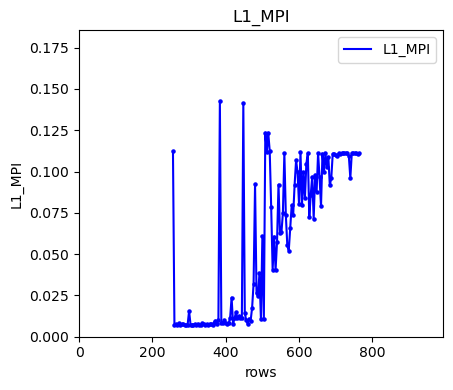

In [28]:

renest_data=PE_calc(renest_run.as_df())
plotPE(df=renest_data, what=[("rows","L1_MPI")], lines=True)

<div class="_solution">
    
It's not very clean, but the increase occurs around the right place.  The two most notable things are the spikes in `L1_MPI` below 512 and the relatively slow increase in MPI past 512.

The spikes are due to the real L1 cache's limited associativity.  The L1 has 512 cache lines with 8 lines per associative set, so there are 64 sets.  For certain unlucky values of `rows`, many of the cache lines that the loop accesses will land in the same associative set.
    
The slow rise in MPI after 512 is a little harder to explain, but there are two likely candidates:
    
1. Intel's cache replacement policies are reported to guard against poorly behave loops (which `x_outside()` is) "blowing out" the cache.
2. Intel's processors also include several prefetchers that predict accesses with a constant stride, which `x_outside()` certainly has.  I've disabled as many of the prefetchers as I have found documentation for, but graphs like this make me think there's still one running somewhere.  
    
</div>


## Loop Tiling

Renesting loops can improve spatial locality, but it is generally less effective for improving temporal locality.  There are two criteria that must be met in order to exploit temporal locality:

1.  The cache line must be re-used.
2.  The re-use must occur before the cache line is evicted by other cache lines coming in the cache.

This second condition has a direct connection to working set size:  If the working set size of a piece of code is too large, it is likely that parts of it will be evicted before they are accessed again, making it hard for the processor to exploit the temporal _and_ spatial locality.

Our goal, then, is to shrink the working set so that it fits in the cache and we can exploit the resulting locality.

As an example, let's consider a 1-dimensional convolution.  

### 1-D Convolution

One-dimensional convolution a simple algorithm and a fundamental building block for many signal processing systems.   The inputs are two 1-dimensional arrays (we will use `tensor_t<uint32_t>`) that we will call the `source` and the `kernel` and it produces a third array called the `target`.  The `kernel` is usually much smaller than the `source` and the `length(target) = length(source) - length(kernel)`.

Conceptually, we compute the entries of `target` by "sliding" `kernel` along `source` and computing the dot product at each position.  Here's a video that illustrates:

In [53]:
display(IFrame("https://www.youtube.com/embed/ulKbLD6BRJA", width=560, height=315))

The code for simple implementation is below:

In [54]:
convolution = build("convolution.cpp", arg_map(OPTIMIZE="-O3", DEBUG_FLAGS="-g0"))
convolution[0].source(show=("//START", "//END"))

  0%|          | 0/1 [00:00<?, ?it/s]

//START
extern "C"
void do_convolution(const tensor_t<uint32_t> & source,
		    const tensor_t<uint32_t> & kernel,
		    tensor_t<uint32_t> & target) {
	disable_prefetcher();
	flush_caches();
	start_measurement();
	for(register int32_t i = 0; i < target.size.x; i++) {
		for(register int32_t j = 0; j < kernel.size.x; j++) {
			target.get(i,0,0,0) += source.get(i + j,0,0,0) * kernel.get(j,0,0,0);
		}
	}
	end_measurement();
}

extern "C"
void convolution(uint64_t source_size, uint64_t kernel_size, int32_t tile_size) {
	tensor_t<uint32_t> source(source_size,1,1,1);
	tensor_t<uint32_t> kernel(kernel_size,1,1,1);
	uint64_t target_size = source_size - kernel_size;
	tensor_t<uint32_t> target(target_size,1,1,1);
	// TAG_START("source", source.data, &source.as_vector(source.element_count()), true);
	// TAG_START("kernel", kernel.data, &kernel.as_vector(kernel.element_count()), true);
	// TAG_START("target", target.data, &target.as_vector(target.element_count()), true);

	
	// Here's the the key part:
	do_convolution(source, kernel, target);
  
	// TAG_STOP("source");
	// TAG_STOP("kernel");
	// TAG_STOP("target");

}

//END

And here's a trace of it running with a 16kB source and 4kB kernel:

![](img/convolution_0.png)

The yellow line is `target`, the light blue band is `kernel`, and the `source` is in purple.  The slow shift upward of `source` shows the sliding slice of `source` that `kernel` is being dot-producted (dot-produced?) with.

It's not easy to tell from the trace, the working is around 150 cache lines or so -- no problem for our processor.   The size of the working set remain roughly constant, although the cache lines that make it up change as the computation moves along source and target.

### Memory Behavior in 1-D Convolution

We can see from the trace that there is quite a bit of reuse:  The code reads `kernel` over and over again, and there's a lot of overlap between the parts of `source` that the program accesses.  There is _a lot_ of temporal locality, and we should be able to use it.

Here's the assembly for `do_convolution()` (our CFG rendered can't handle it :-().  A few notes:

1. `%rdi` points to `source`
2. `%rsi` points to `kernel`
3. `%rdx` points to `target`
4.  Note how constant propagation and inlining have turned all those calls to `get()` into very simple code.
5.  The inner loop body starts an `.L41`


In [73]:
convolution[0].asm("do_convolution")

do_convolution:
.LFB3135:
	.cfi_startproc
	endbr64
	pushq	%r12
	.cfi_def_cfa_offset 16
	.cfi_offset 12, -16
	movq	%rdx, %r12
	pushq	%rbp
	.cfi_def_cfa_offset 24
	.cfi_offset 6, -24
	movq	%rdi, %rbp
	pushq	%rbx
	.cfi_def_cfa_offset 32
	.cfi_offset 3, -32
	movq	%rsi, %rbx
	call	disable_prefetcher()@PLT
	call	flush_caches()@PLT
	xorl	%edi, %edi
	call	start_measurement@PLT
	movl	(%r12), %eax
	testl	%eax, %eax
	jle	.L39
	movl	(%rbx), %ecx
	xorl	%r10d, %r10d
	xorl	%r11d, %r11d
	testl	%ecx, %ecx
	jle	.L39
	.p2align 4,,10
	.p2align 3
.L43:
	movq	16(%r12), %rdi
	movq	16(%rbp), %r8
	xorl	%eax, %eax
	movq	16(%rbx), %r9
	addq	%r10, %rdi
	addq	%r10, %r8
	movl	(%rdi), %esi
	.p2align 4,,10
	.p2align 3
.L41:
	movl	(%r8,%rax,4), %ecx
	imull	(%r9,%rax,4), %ecx
	addq	$1, %rax
	addl	%ecx, %esi
	movl	%esi, (%rdi)
	movl	(%rbx), %ecx
	cmpl	%eax, %ecx
	jg	.L41
	addl	$1, %r11d
	cmpl	(%r12), %r11d
	jge	.L39
	addq	$4, %r10
	testl	%ecx, %ecx
	jg	.L43
.L39:
	popq	%rbx
	.cfi_def_cfa_offset 24
	popq	%rbp
	.cfi_def_cfa_offset 16
	popq	%r12
	.cfi_def_cfa_offset 8
	jmp	end_measurement@PLT
	.cfi_endproc

<div class="question correctness points-2">
    
<div class="question-text">

How many loads does the inner loop perform per iteration?  How many stores? (Recall that `op rl, r2` in x86 means `r2 = r1 op r2`).  If `source` has 4096 element and `kernel` has 512 element, what's the dynamic instruction count for each loop (to within 10% -- you don't need to be perfectly exact.  Show your work.)?  What fraction of the execution is spent on the outer loop?
    
</div>
<div class="answer">

|  | Inner loop | Outer loop (excluding the inner loop) | 
|--|-------------|----------|
| Instructions | 8 | 13
| Loads | 3 | 5
| Stores | 1 | 0

    
|  | Inner loop | Outer loop (excluding the inner loop) |
|--|-------------|----------|
| Dynamic Instruction count| 7 * 3584 * 512 = 12845056 | 11 * 3584 = 39424
| % of IC | 12845056 / (12845056 + 39424) = 99.7% | 39424 / (12845056 + 39424) = 0.3%

</div>
    
</div>    


<div class="question completeness">
    
<div class="question-text">

Compute (rather than measure as you did above) the size of the working set of this computation?  What would it be if `kernel` were 32kB, and `source` was 128kB.  Roughly estimate the cache hit rate in each case.
    
</div>
<div class="answer">
 
**Working set for 16kB source and 4kB kernel**: 8kB

**Estimated hit rate**: (1) * 100%
    
**Working set for 128kB source and 32kB kernel**: 64kB

**Estimated hit rate**: (1 - 2 * 1/16 * 1/8) * 100% = 98.4375%

</div>
    
</div>    


<div class="solution">

In both cases, working set is roughly twice the size of `kernel`.  Each iteration accesses all of `kernel`, an equal-sized chunk of `source`, and one element of `target`.
    
For a 4kB kernel (`size = 1024`), this is 8kB (or 128 cache lines).  For a 32kB kernel, it 64kB or about 1024 cache lines.

To estimate the cache miss rate, first note that for the smaller data size, the working set is smaller than the L1, so the hit rate should be near zero.
    
For the larger size, we need to think through the source code.  From the previous question (and Amdahl's Law), we know know that the inner loop is all that really matters, so we can focus there.

Each iteration of the inner loop performs 4 memory operations:

<div class="answer">

| ||
|-|-|
|movl	(%r9,%rax,4), %ecx| load|
|imull	(%r10,%rax,4), %ecx| load + multiply|
|	movl	%edi, (%r8)| store to `target`|
|	movl	(%rsi), %ecx| load |

</div>
    
The `movl` and the `mull` are both going to take capacity misses for each cache line they access, even though the tend to access the same data from one iteration of the outer loop to the next.   Between them they read 64kB of data, too much for the L1 to hold.  Since `uint32_t` is 4 bytes, there are 16 of them per cache line.  Therefore, both of these instructions will miss 1/16 of the time. 

The store to `target` and the final `movl` will usually be a hit, since `%rsi` and `%r8` only changes in the outer loop. 

I don't know why the load from `%rsi` is there, but I couldn't get the compiler to get rid of it (exercise for the reader).

So, there are likely to be 2 * 1/16 of a cache miss per iteration of the inner loop.  There are 8 instructions in the inner loop, so the `L1_MPI` should be about 0.015.

Let's check:

</div>

In [ ]:

to_run =  arg_map(executable=convolution, 
                  function="convolution", 
                  arguments=arg_map(source_size=4*1024, kernel_size=1024, tile_size=0),
                  run_options=arg_map(MHz=3500))
to_run += arg_map(executable=convolution, 
                  function="convolution", 
                  arguments=arg_map(source_size=32*1024, kernel_size=8*1024, tile_size=0),
                  run_options=arg_map(MHz=3500))
misses = run_list(to_run, perf_counters=["L1-DCACHE-LOAD-MISSES",  "PERF_COUNT_HW_INSTRUCTIONS","PERF_COUNT_HW_CPU_CYCLES"])
    

In [ ]:
misses_data = PE_calc(misses.as_df())
display(misses_data)

<div class="_solution">
    
Pretty good agreement!  The `L1_MPI` should match our prediction for the large data size and be roughly 0 for the small data size.

</div>

### Tiling 1-D Convolution

We are going to "tile" the execution of this function to reduce the number of cache misses for large data sets.  Tiling works by breaking up the execution of a set of nested loops into smaller parts with smaller working sets.  If the resulting working set fits in the cache, the number of cache misses should drop significantly.

We'll perform the tiling in two steps:

1.  We'll "split" a loop into two nested loops. 
2.  Then we'll renest the resulting loops.

To split a loop, we will break the loop into fixed-size chunks.   The outer loop will iterate over the chunks, and the inner loop will iterate over the elements within a chunk.  This first transformation _has no effect_ on the order in which computation occurs.

Here's version of the convolution code with the `kernel` loop split into chunks of size `tile_size` (we'll set `tile_size` to 64 for now):

In [55]:
convolution[0].source("do_convolution_new_loop")

void do_convolution_new_loop(const tensor_t<uint32_t> & source,
			     const tensor_t<uint32_t> & kernel,
			     tensor_t<uint32_t> & target, int32_t tile_size) {

	start_measurement();
	for(int32_t i = 0; i < target.size.x; i++) {
		// We create a new loop variable jj that advanced one chunk at a time.
		for(int32_t jj = 0; jj < kernel.size.x; jj += tile_size) {
			// We iterate over the chunk.  The more complicated termination 
			// condition keeps ups from running off the end of the arry
			for(int32_t j = jj; j < kernel.size.x && j < jj + tile_size; j++) { 
				target.get(i,0,0,0) += source.get(i + j,0,0,0) * kernel.get(j,0,0,0);
			}
		}
	}
	end_measurement();
  

}

Here's the trace for the 4kB source and 1kB kernel.  Nothing changes:

![](img/convolution_new_loop_small_0.png)

And here's the trace for the big data set

![](img/convolution_new_loop_big_0.png)



Here it is the same code on a much larger data set that doesn't fit in the L1.  The slop of the lines is less pronounced because are only seeing the first 10 million memory accesses (which is all Moneta can display at once).  You might notice that the data structures are laid out differently (i.e., the color stripes are in a different order) in this plot than the one above.  This is the memory allocator putting things wherever it wants.  The color scheme is the same across all these plots.

The next step is to renest the split loop.  Here's the code.  The only change is that we swapped the order of the `jj` loop and the `i` loop. Now, we will run the whole algorithm for 2048 elements of the `kernel` at a time.

In [ ]:
convolution[0].source("do_convolution_tiled")

Here's this code running on the small data set:

![](img/convolution_tiled_little_0.png)

Well, that's different! 

Let's take a look at the access pattern for each of the tensors:

**`kernel`**

The kernel is in light blue and labeled with tag 'kernel'.  Let's zoom in:

![](img/tiled_small_kernel_zoom.png)

The chunking structure shows up as a "stair step" pattern.  Each of the light blue blocks shows the portion of the `kernel` tensor the code is processing for each chunk.

**`target`**

Zooming waaay in on `target` and we can see individual accesses.  You'll see that for each chunk, we make a linear pass over `target`, accessing each element once.

![](img/tiled_small_target_zoom.png)

**`source`**

Zooming in on `source`:

![](img/tiled_small_source_zoom.png)

The thick stripe is the code accessing each element of the tensor repeatedly for each chunk.

`target` and `source` both exhibit reuse -- one of the two criteria necessary to leverage spatial locality.  The second criteria is that the working set fits in the cache.

Let's run it on a data set that won't fit in the L1.  The trace shows just 1.5 or so chunks worth of execution.  The "sawtooth" pattern would continue if we could trace more accesses.

![](img/convolution_tiled_big_0.png)

Let's see how the cache is doing.  We'll compare the untiled version and the tiled version on two large datasets:


In [74]:

tiled_run = run(convolution, 
                    function=["convolution", "convolution_tiled"], 
                    arguments=arg_map(source_size=32*1024, kernel_size=8*1024, tile_size=64) +
                              arg_map(source_size=4*32*1024*4, kernel_size=8*1024*4, tile_size=64),
                    perf_counters=["L1-DCACHE-LOAD-MISSES",  "PERF_COUNT_HW_INSTRUCTIONS","PERF_COUNT_HW_CPU_CYCLES"])
    

You are submitting a job for lab "Lab 4: Caches II" (caches2).
Creating job c530bb21-9495-4151-97ee-57466cb82d6a 0.00 0.00
Ready for submission. 2.31 2.31
Job c530bb21-9495-4151-97ee-57466cb82d6a is in state 'PUBLISHED'. 2.88 5.19 
Job c530bb21-9495-4151-97ee-57466cb82d6a is in state 'RUNNING'. 1.04 6.22....................... 
Job c530bb21-9495-4151-97ee-57466cb82d6a is in state 'DONE_RUNNING'. 24.98 31.20... 
Job c530bb21-9495-4151-97ee-57466cb82d6a succeeded. 4.16 35.36Writing results 1.00 36.36
  0%|          | 0/4 [00:00<?, ?it/s]
Updated these files: ./.cfiddle/builds/build/f472dbdc12c092c50adaf0db79f7e916_convolution/convolution.cpp.convolution(32768, 8192, 64).csv
./.cfiddle/builds/build/f472dbdc12c092c50adaf0db79f7e916_convolution/convolution.cpp.convolution(524288, 32768, 64).csv
./.cfiddle/builds/build/f472dbdc12c092c50adaf0db79f7e916_convolution/convolution.cpp.convolution_tiled(32768, 8192, 64).csv
./.cfiddle/builds/build/f472dbdc12c092c50adaf0db79f7e916_convolution/convol

In [75]:

tiled_data = PE_calc(tiled_run.as_df())
display(tiled_data)

,function,tile_size,source_size,kernel_size,OPTIMIZE,requestedMHz,realMHz,cycles,IC,CPI,CT,ET,L1_cache_misses,L1_MPI
0,convolution,64,32768,8192,-O3,3500,3485.178438,417702121,1610957153,0.259288,2.869294e-10,0.119851,25123789,0.015596
1,convolution,64,524288,32768,-O3,3500,3485.404352,40011396343,128855911888,0.310513,2.869108e-10,11.479700,2013311459,0.015625
2,convolution_tiled,64,32768,8192,-O3,3500,3484.320784,426101073,2069816946,0.205864,2.870000e-10,0.122291,394239,0.000190
3,convolution_tiled,64,524288,32768,-O3,3500,3485.803639,34684722235,165589662785,0.209462,2.868779e-10,9.950280,31507412,0.000190


There are two things to note: 

1.  Tiling reduced `L1_MPI` by two orders of magnitude (about 100x)
2.  For the tiled version, the `L1_MPI` and `CPI` change very little (~1%) as the data set size increased.  This is because the tile size (rather than the total data size) sets the working set.

We would hope to see a large boost in performance with tiling.  We get a boost, but is it at as large as you'd expect?

<div class="question correctness points-2">
    
<div class="question-text">

Consider the speedup provided by each term of the performance equation for the largest data set.  Show your work.  What contributes to and detracts from achieving a larger, overall improvement in performance? 
</div>
<div class="answer">
    
IC: speedup = 128855911888 / 165589662785 = 0.778
    
CPI: speedup = 0.310513 / 0.209462 = 1.482
    
CT: speedup = 2.869108e-10 / 2.868779e-10 = 1.000

The speedup in the CPI contributes to achieving a larger, overall improvement in performance.
The speedup in the Instruction Count detracts from achieving a larger, overall improvement in performance. The cycle time stays the same.
    



    

</div>
    
</div>    

Hmmm....

What happened?  L1_MPI is low, CPI went down, but ET went up!

So how can we get IC under control?

Let's look at the assembly.  On the left is the untiled version.  On the right, it is tiled.

In [76]:
compare([convolution[0].asm("do_convolution"),
         convolution[0].asm("do_convolution_tiled")], ["not tiled", "tiled"])

<div class="question completeness">
    
<div class="question-text">

Give the labels that mark the beginning and end of the inner loop for the tiled code.
    
</div>
<div class="answer">
The inner loop begins at the label .L234 and ends at the label .L221
</div>
    
</div>    

<div class="solution">

We already found the inner loop for the untiled code.  It's between `.L41` and the `jg .L4`.  You can tell it's the inner loop because there are no branches inside.  In this case, the loop-terminating branch (`jg .L4`) is _not taken_ on the last iteration of the loop, but is _taken_ during the loops execution. 
    
We can look for a similar structure in the tiled version is a little more complicated (give it a try).

Here's a hint:  The loop termination condition for the tiled version is _taken_ on the last iteration of the loop, so it jumps out of the loop when the loop is finished.
    
Here's another hint:  It starts at `.L234`.  But where's the end?
    
It ends at `.L221`.
    
The weird part is that there are two branches that can exit the loop:  either `jg	.L234` or `je	.L221`.  

We could dissect the assembly to figure out why that is, but what we are actually after is the size of the inner loop (see the question below), and we can tell that already:  We know that there must be a multiply in the inner loop (since that's what the source code says), and there it is: `imull	-4(%r8,%rax,4), %edx`.  So, the inner loop body must be whatever instructions execute each time the multiply executes, and that's the code between `.L234` and `.L22` (Trace through the possible paths execution can take to convince yourself of this).
    
Optional question: What's the compiler doing with each of those loop exit conditions?

</div>

<div class="question correctness points-3">
    
<div class="question-text">

For the inner loop body of each version, fill out the table below assuming that `kernel` is 64kB (16k entries) and `source` is 512kB (64k entries). 
    
</div>
<div class="answer">

| |# of times executed | static insturctions  | dynamic instructions | 
|--|-|-|-|
|untiled | 768000000 | 8 | 7
|tiled | 768000000 | 10 | 8

**Ratio of Tiled IC/Untiled IC**: (10 * 768000000) / (8 * 768000000) = 10/8 = 1.25
    
</div>
    
</div>    

In the tiled code, there are some extra instructions in the inner loop.  They are due to the more complex loop completion condition required by tiling.  This eats into our performance!

<div class="question completeness">
    
<div class="question-text">

Modify the cell below (it's the same code as `convolution_tiled()`) to reduce loop overhead and achieve speedup with tiling.

</div>
    
</div>    

In [78]:

convolution_question = build(code(r"""
#include"cfiddle.hpp"
#include"tensor_t.hpp"
#include"util.hpp"
#include<cstdint>
#include<cassert>

extern "C"
void do_convolution_tiled(const tensor_t<uint32_t> & source,
                          const tensor_t<uint32_t> & kernel,
                          tensor_t<uint32_t> & target, int32_t tile_size) {
        disable_prefetcher();
        flush_caches();

        start_measurement();
        for(int32_t jj = 0; jj < kernel.size.x; jj += tile_size) {  // Move the jj chunk loop outside
                for(int32_t i = 0; i < target.size.x; i++) {
                        for(int32_t j = jj; j < kernel.size.x && j < jj + tile_size; j += 8) {
                                target.get(i,0,0,0) += source.get(i + j,0,0,0) * kernel.get(j,0,0,0);
                                target.get(i,0,0,0) += source.get(i + j + 1,0,0,0) * kernel.get(j + 1,0,0,0);
                                target.get(i,0,0,0) += source.get(i + j + 2,0,0,0) * kernel.get(j + 2,0,0,0);
                                target.get(i,0,0,0) += source.get(i + j + 3,0,0,0) * kernel.get(j + 3,0,0,0);
                                target.get(i,0,0,0) += source.get(i + j + 4,0,0,0) * kernel.get(j + 4,0,0,0);
                                target.get(i,0,0,0) += source.get(i + j + 5,0,0,0) * kernel.get(j + 5,0,0,0);
                                target.get(i,0,0,0) += source.get(i + j + 6,0,0,0) * kernel.get(j + 6,0,0,0);
                                target.get(i,0,0,0) += source.get(i + j + 7,0,0,0) * kernel.get(j + 7,0,0,0);
                        }
                }
        }
        end_measurement();
}

extern "C"
void convolution_tiled(uint64_t source_size,  uint64_t kernel_size, int32_t tile_size) {
        tensor_t<uint32_t> source(source_size,1,1,1);
        tensor_t<uint32_t> kernel(kernel_size,1,1,1);
        uint64_t target_size = source_size - kernel_size;
        tensor_t<uint32_t> target(target_size,1,1,1);

        do_convolution_tiled(source, kernel, target, tile_size);
}
""", file_name="convolution_question.cpp"), build_parameters=arg_map(OPTIMIZE="-O3"))

cq_run = run(convolution_question, function="convolution_tiled", arguments=arg_map(source_size=4*32*1024*4, 
                                                                                   kernel_size=8*1024*4, 
                                                                                   tile_size=64))

cq_data = PE_calc(cq_run.as_df())
display(tiled_data) # this is the data from above for comparison
display(cq_data)


  0%|          | 0/1 [00:00<?, ?it/s]

You are submitting a job for lab "Lab 4: Caches II" (caches2).
Creating job 6e386183-0d97-4e36-8dd2-af0b3c87f8f4 0.00 0.00
Ready for submission. 2.27 2.27
Job 6e386183-0d97-4e36-8dd2-af0b3c87f8f4 is in state 'PUBLISHED'. 3.44 5.70 
Job 6e386183-0d97-4e36-8dd2-af0b3c87f8f4 is in state 'RUNNING'. 1.03 6.74........ 
Job 6e386183-0d97-4e36-8dd2-af0b3c87f8f4 is in state 'DONE_RUNNING'. 9.48 16.21... 
Job 6e386183-0d97-4e36-8dd2-af0b3c87f8f4 succeeded. 4.15 20.37Writing results 1.00 21.37
  0%|          | 0/1 [00:00<?, ?it/s]
Updated these files: ./.cfiddle/builds/build/44dda48352c0a2705dc6437a83da4050_convolution_question/convolution_question.cpp.convolution_tiled(524288, 32768, 64).csv
./.cfiddle/builds/results.pickle
Job Complete 0.31 21.68


NameError: name 'tiled_data' is not defined

<div class="solution">
    
Loop overhead is additional instructions that are necessary to implement and terminate the loop:  Exit condition checks, counter increments, branches.  Each iteration incurs these overheads, so the total overhead is equal to the number of iteration multiplied by the per-iteration overhead.  So, we can reduce the total overhead by reducing the number of iterations or the per-iteration overhead.

Let's start with reducing the number of iterations.  The easiest way to achieve this would be to unroll the loop.  For some reason the compiler choose not to unroll this loop, but let's force it to.  You could do this by adding `-funroll-loops` or `-funroll-all-loops` to the `build()` command above, but there's an unrolled version in `convolution.cpp`:

</div>

In [56]:
display(convolution[0].source("do_convolution_tiled_unrolled"))

ca_answer = run(convolution, function="convolution_tiled_unrolled", arguments=arg_map(source_size=4*32*1024*4, 
                                                                                      kernel_size=8*1024*4, 
                                                                                      tile_size=64))

ca_data = PE_calc(ca_answer.as_df())
display(tiled_data) # this is the data from above for comparison
display(ca_data)

void  __attribute__((optimize("unroll-loops"))) do_convolution_tiled_unrolled(const tensor_t<uint32_t> & source,
									      const tensor_t<uint32_t> & kernel,
									      tensor_t<uint32_t> & target, int32_t tile_size) {

	start_measurement();
	for(int32_t jj = 0; jj < kernel.size.x; jj += tile_size) {  // Move the jj chunk loop outside
		for(int32_t i = 0; i < target.size.x; i++) {
			for(int32_t j = jj; j < kernel.size.x && j < jj + tile_size; j++) {
				target.get(i,0,0,0) += source.get(i + j,0,0,0) * kernel.get(j,0,0,0);
			}
		}
	}
	end_measurement();

}

You are submitting a job for lab "Lab 4: Caches II" (caches2).
Creating job 735b84d3-8915-4e10-af59-f49b505b2f7f 0.00 0.00
Ready for submission. 2.43 2.43
Job 735b84d3-8915-4e10-af59-f49b505b2f7f is in state 'PUBLISHED'. 1.91 4.34 
Job 735b84d3-8915-4e10-af59-f49b505b2f7f is in state 'RUNNING'. 1.04 5.38........... 
Job 735b84d3-8915-4e10-af59-f49b505b2f7f is in state 'DONE_RUNNING'. 12.47 17.84... 
Job 735b84d3-8915-4e10-af59-f49b505b2f7f succeeded. 4.20 22.04Writing results 1.00 23.05
  0%|          | 0/1 [00:00<?, ?it/s]
Updated these files: ./.cfiddle/builds/build/f472dbdc12c092c50adaf0db79f7e916_convolution/convolution.cpp.convolution_tiled_unrolled(524288, 32768, 64).csv
./.cfiddle/builds/results.pickle
Job Complete 0.30 23.35


NameError: name 'tiled_data' is not defined

<div class="_solution">

The bottom two rows are all that matter. 
    
It's a little better, but not much. It appears the compiler's decision not to unroll was not quite correct.

But why didn't it help more?  Let's look at the unrolled assembly:

</div>

In [78]:
convolution[0].asm("do_convolution_tiled_unrolled")

do_convolution_tiled_unrolled:
.LFB3143:
	.cfi_startproc
	endbr64
	pushq	%r15
	.cfi_def_cfa_offset 16
	.cfi_offset 15, -16
	movq	%rdi, %r15
	xorl	%edi, %edi
	pushq	%r14
	.cfi_def_cfa_offset 24
	.cfi_offset 14, -24
	movl	%ecx, %r14d
	pushq	%r13
	.cfi_def_cfa_offset 32
	.cfi_offset 13, -32
	movq	%rdx, %r13
	pushq	%r12
	.cfi_def_cfa_offset 40
	.cfi_offset 12, -40
	pushq	%rbp
	.cfi_def_cfa_offset 48
	.cfi_offset 6, -48
	pushq	%rbx
	.cfi_def_cfa_offset 56
	.cfi_offset 3, -56
	movq	%rsi, %rbx
	subq	$24, %rsp
	.cfi_def_cfa_offset 80
	movl	%ecx, 12(%rsp)
	call	start_measurement@PLT
	movl	(%rbx), %ecx
	testl	%ecx, %ecx
	jle	.L284
	movslq	%r14d, %rdi
	movl	0(%r13), %eax
	xorl	%ebp, %ebp
	movq	%rdi, (%rsp)
	leal	-1(%rdi), %r12d
	addq	$2, %r12
	.p2align 4,,10
	.p2align 3
.L285:
	movl	12(%rsp), %esi
	leal	(%rsi,%rbp), %r14d
	testl	%eax, %eax
	jle	.L291
	xorl	%r11d, %r11d
	leal	1(%rbp), %esi
	movl	%esi, 8(%rsp)
	movl	%r11d, %r10d
	cmpl	%ecx, %ebp
	jge	.L291
	.p2align 4,,10
	.p2align 3
.L345:
	cmpl	%r14d, %ebp
	jge	.L288
	movq	16(%r13), %rdi
	movslq	8(%rsp), %rax
	leaq	0(,%r11,4), %rsi
	movq	%r12, %rcx
	movq	16(%rbx), %r8
	addq	%rsi, %rdi
	subq	%rax, %rcx
	addq	16(%r15), %rsi
	movl	(%rdi), %edx
	andl	$7, %ecx
	je	.L287
	cmpq	$1, %rcx
	je	.L317
	cmpq	$2, %rcx
	je	.L318
	cmpq	$3, %rcx
	je	.L319
	cmpq	$4, %rcx
	je	.L320
	cmpq	$5, %rcx
	je	.L321
	cmpq	$6, %rcx
	je	.L322
	movl	-4(%rsi,%rax,4), %ecx
	imull	-4(%r8,%rax,4), %ecx
	addl	%ecx, %edx
	movl	%edx, (%rdi)
	movl	(%rbx), %ecx
	cmpl	%eax, %ecx
	jle	.L286
	addq	$1, %rax
.L322:
	movl	-4(%rsi,%rax,4), %ecx
	imull	-4(%r8,%rax,4), %ecx
	addl	%ecx, %edx
	movl	%edx, (%rdi)
	movl	(%rbx), %ecx
	cmpl	%eax, %ecx
	jle	.L286
	addq	$1, %rax
.L321:
	movl	-4(%rsi,%rax,4), %ecx
	imull	-4(%r8,%rax,4), %ecx
	addl	%ecx, %edx
	movl	%edx, (%rdi)
	movl	(%rbx), %ecx
	cmpl	%eax, %ecx
	jle	.L286
	addq	$1, %rax
.L320:
	movl	-4(%rsi,%rax,4), %ecx
	imull	-4(%r8,%rax,4), %ecx
	addl	%ecx, %edx
	movl	%edx, (%rdi)
	movl	(%rbx), %ecx
	cmpl	%eax, %ecx
	jle	.L286
	addq	$1, %rax
.L319:
	movl	-4(%rsi,%rax,4), %ecx
	imull	-4(%r8,%rax,4), %ecx
	addl	%ecx, %edx
	movl	%edx, (%rdi)
	movl	(%rbx), %ecx
	cmpl	%eax, %ecx
	jle	.L286
	addq	$1, %rax
.L318:
	movl	-4(%rsi,%rax,4), %ecx
	imull	-4(%r8,%rax,4), %ecx
	addl	%ecx, %edx
	movl	%edx, (%rdi)
	movl	(%rbx), %ecx
	cmpl	%eax, %ecx
	jle	.L286
	addq	$1, %rax
.L317:
	movl	-4(%rsi,%rax,4), %ecx
	imull	-4(%r8,%rax,4), %ecx
	addl	%ecx, %edx
	movl	%edx, (%rdi)
	movl	(%rbx), %ecx
	cmpl	%eax, %ecx
	jle	.L286
	addq	$1, %rax
	cmpq	%r12, %rax
	je	.L286
.L287:
	movl	-4(%rsi,%rax,4), %ecx
	imull	-4(%r8,%rax,4), %ecx
	addl	%ecx, %edx
	movl	%edx, (%rdi)
	movl	(%rbx), %ecx
	cmpl	%eax, %ecx
	jle	.L286
	leaq	1(%rax), %r9
	movl	-4(%rsi,%r9,4), %ecx
	imull	-4(%r8,%r9,4), %ecx
	addl	%ecx, %edx
	movl	%edx, (%rdi)
	movl	(%rbx), %ecx
	cmpl	%r9d, %ecx
	jle	.L286
	addq	$2, %rax
	movl	-4(%rsi,%rax,4), %ecx
	imull	-4(%r8,%rax,4), %ecx
	addl	%ecx, %edx
	movl	%edx, (%rdi)
	movl	(%rbx), %ecx
	cmpl	%eax, %ecx
	jle	.L286
	leaq	2(%r9), %rax
	movl	-4(%rsi,%rax,4), %ecx
	imull	-4(%r8,%rax,4), %ecx
	addl	%ecx, %edx
	movl	%edx, (%rdi)
	movl	(%rbx), %ecx
	cmpl	%eax, %ecx
	jle	.L286
	leaq	3(%r9), %rax
	movl	-4(%rsi,%rax,4), %ecx
	imull	-4(%r8,%rax,4), %ecx
	addl	%ecx, %edx
	movl	%edx, (%rdi)
	movl	(%rbx), %ecx
	cmpl	%eax, %ecx
	jle	.L286
	leaq	4(%r9), %rax
	movl	-4(%rsi,%rax,4), %ecx
	imull	-4(%r8,%rax,4), %ecx
	addl	%ecx, %edx
	movl	%edx, (%rdi)
	movl	(%rbx), %ecx
	cmpl	%eax, %ecx
	jle	.L286
	leaq	5(%r9), %rax
	movl	-4(%rsi,%rax,4), %ecx
	imull	-4(%r8,%rax,4), %ecx
	addl	%ecx, %edx
	movl	%edx, (%rdi)
	movl	(%rbx), %ecx
	cmpl	%eax, %ecx
	jle	.L286
	leaq	6(%r9), %rax
	movl	-4(%rsi,%rax,4), %ecx
	imull	-4(%r8,%rax,4), %ecx
	addl	%ecx, %edx
	movl	%edx, (%rdi)
	movl	(%rbx), %ecx
	cmpl	%eax, %ecx
	jle	.L286
	leaq	7(%r9), %rax
	cmpq	%r12, %rax
	jne	.L287
	.p2align 4,,10
	.p2align 3
.L286:
	movl	0(%r13), %eax
.L288:
	addl	$1, %r10d
	cmpl	%eax, %r10d
	jge	.L291
	addq	$1, %r11
	movl	%r11d, %r10d
	cmpl	%ecx, %ebp
	jl	.L345
.L291:
	movl	%r14d

<div class="_solution">

What a mess!  Can you find the inner loop?  Remember, it's unrolled!

It appears to be a huge jumble but it's not actually that complicated.  Here's the pseudo code for what's (roughly) going on in the unrolled loop:

```
for(i =0; i < bound; i+=8) {
    do_iteration(i++);
    if (i <= bound) goto end;
    do_iteration(i++);
    if (i <= bound) goto end;
    do_iteration(i++);
    if (i <= bound) goto end;
    do_iteration(i++);
    if (i <= bound) goto end;
    do_iteration(i++);
    if (i <= bound) goto end;
    do_iteration(i++);
    if (i <= bound) goto end;
    do_iteration(i++);
    if (i <= bound) goto end;
    do_iteration(i++);
}
end:
```

It really isn't saving any loop bound checks, so it's not surprising that IC doesn't change much.

Don't give up yet!  We can do better.

We need to make the compiler's job easier.  The reason for all the bounds checks in the unrolled loop is that the bound could be anything.  If we constrain the loop bound, the compiler can unroll more efficiently.

We have not solved the problem, but we can now ask a more focused question.

</div>

<div class="question completeness">
    
<div class="question-text">

Go back up to the fiddle you worked on earlier.  Try to reduce loop overhead due to unrolling. Feel free to start with the code for `convolution_tiled_unrolled()`.

</div>
    
</div>    

In [80]:

convolution_question = build(code(r"""
#include"cfiddle.hpp"
#include"tensor_t.hpp"
#include"util.hpp"
#include<cstdint>
#include<cassert>

extern "C"
void do_convolution_tiled(const tensor_t<uint32_t> & source,
                          const tensor_t<uint32_t> & kernel,
                          tensor_t<uint32_t> & target, int32_t tile_size) {
        disable_prefetcher();
        flush_caches();

        start_measurement();
        for(int32_t jj = 0; jj < kernel.size.x; jj += tile_size) {  // Move the jj chunk loop outside
                for(int32_t i = 0; i < target.size.x; i++) {
                        int32_t j = jj;
                        for(; j < kernel.size.x && j < jj + tile_size; j += 8) {
                                target.get(i,0,0,0) += source.get(i + j,0,0,0) * kernel.get(j,0,0,0);
                                target.get(i,0,0,0) += source.get(i + j + 1,0,0,0) * kernel.get(j + 1,0,0,0);
                                target.get(i,0,0,0) += source.get(i + j + 2,0,0,0) * kernel.get(j + 2,0,0,0);
                                target.get(i,0,0,0) += source.get(i + j + 3,0,0,0) * kernel.get(j + 3,0,0,0);
                                target.get(i,0,0,0) += source.get(i + j + 4,0,0,0) * kernel.get(j + 4,0,0,0);
                                target.get(i,0,0,0) += source.get(i + j + 5,0,0,0) * kernel.get(j + 5,0,0,0);
                                target.get(i,0,0,0) += source.get(i + j + 6,0,0,0) * kernel.get(j + 6,0,0,0);
                                target.get(i,0,0,0) += source.get(i + j + 7,0,0,0) * kernel.get(j + 7,0,0,0);
                        }
                        for(; j < kernel.size.x && j < jj + tile_size; j++) {
                                target.get(i,0,0,0) += source.get(i + j,0,0,0) * kernel.get(j,0,0,0);
                        }
                }
        }
        end_measurement();
}

extern "C"
void convolution_tiled(uint64_t source_size,  uint64_t kernel_size, int32_t tile_size) {
        tensor_t<uint32_t> source(source_size,1,1,1);
        tensor_t<uint32_t> kernel(kernel_size,1,1,1);
        uint64_t target_size = source_size - kernel_size;
        tensor_t<uint32_t> target(target_size,1,1,1);

        do_convolution_tiled(source, kernel, target, tile_size);
}
""", file_name="convolution_question.cpp"), build_parameters=arg_map(OPTIMIZE="-O3"))

cq_run = run(convolution_question, function="convolution_tiled", arguments=arg_map(source_size=4*32*1024*4, 
                                                                                   kernel_size=8*1024*4, 
                                                                                   tile_size=64))

cq_data = PE_calc(cq_run.as_df())
display(tiled_data) # this is the data from above for comparison
display(cq_data)


  0%|          | 0/1 [00:00<?, ?it/s]

You are submitting a job for lab "Lab 4: Caches II" (caches2).
Creating job 93dc9d19-a604-42a4-b3a9-855bf9ccff8d 0.00 0.00
Ready for submission. 2.47 2.47
Job 93dc9d19-a604-42a4-b3a9-855bf9ccff8d is in state 'PUBLISHED'. 2.16 4.63 
Job 93dc9d19-a604-42a4-b3a9-855bf9ccff8d is in state 'RUNNING'. 1.04 5.67......... 
Job 93dc9d19-a604-42a4-b3a9-855bf9ccff8d is in state 'DONE_RUNNING'. 11.48 17.15.. 
Job 93dc9d19-a604-42a4-b3a9-855bf9ccff8d succeeded. 3.12 20.28Writing results 1.00 21.28
  0%|          | 0/1 [00:00<?, ?it/s]
Updated these files: ./.cfiddle/builds/build/44dda48352c0a2705dc6437a83da4050_convolution_question/convolution_question.cpp.convolution_tiled(524288, 32768, 64).csv
./.cfiddle/builds/results.pickle
Job Complete 0.32 21.60


NameError: name 'tiled_data' is not defined

<div class="solution">

Most of the time, the inner loop runs from `jj` to `jj+tile_size`.  But, once every outer loop iteration, it might run fewer iterations if `jj+tile_size > kernel.size.x`.
    
As mentioned, in Lab 2, gcc likes to unroll loops 8 times.  This means that if `tile_size` is a multiple of 8, then the common case (`j = jj..jj+tile_size`) should not required any bounds checks in the unrolled loop body.  The compiler can just do this:

    
```
for(j = jj; j < jj + tile_size; i+=8) {
    do_iteration(i++);
    do_iteration(i++); 
    do_iteration(i++);
    do_iteration(i++);
    do_iteration(i++);
    do_iteration(i++);
    do_iteration(i++);
    do_iteration(i++);
}
```

So, how can we 1) ensure that `tile_size % 8 == 0` and 2) separate out the `j = jj..jj+tile_size` case from the occasional boundary condition?  
                  
For #1, we can just check chop off the 3 low-order bits of `tile_size`.  Note that it's not sufficient to just pass multiples of 8 with `tile-size` parameter, the compiler must know for certain that `tile_size` is multiple of 8.
    
For #2, we can check for the boundary condition and handle it as a special case, but do it _outside the loop_.  Then, we'll rely on the compiler to unroll:

</div>

In [ ]:
display(convolution[0].source("do_convolution_tiled_split"))

ca2_answer = run(convolution, function="convolution_tiled_split", arguments=arg_map(source_size=4*32*1024*4, 
                                                                                    kernel_size=8*1024*4, 
                                                                                    tile_size=64))

ca2_data = PE_calc(ca2_answer.as_df())
display(tiled_data) # this is the data from above for comparison
display(ca_data)
display(ca2_data)

<div class="_solution">

Finally!  At long last!  Good speedup! 1.6x in fact (at least that's what I got)!

Let's checkout the assembly:

</div>

In [81]:
convolution[0].asm("do_convolution_tiled_split")

do_convolution_tiled_split:
.LFB3145:
	.cfi_startproc
	endbr64
	pushq	%r15
	.cfi_def_cfa_offset 16
	.cfi_offset 15, -16
	leal	7(%rcx), %eax
	pushq	%r14
	.cfi_def_cfa_offset 24
	.cfi_offset 14, -24
	pushq	%r13
	.cfi_def_cfa_offset 32
	.cfi_offset 13, -32
	pushq	%r12
	.cfi_def_cfa_offset 40
	.cfi_offset 12, -40
	pushq	%rbp
	.cfi_def_cfa_offset 48
	.cfi_offset 6, -48
	pushq	%rbx
	.cfi_def_cfa_offset 56
	.cfi_offset 3, -56
	subq	$24, %rsp
	.cfi_def_cfa_offset 80
	testl	%ecx, %ecx
	cmovns	%ecx, %eax
	andl	$-8, %eax
	movl	%eax, 4(%rsp)
	cmpl	$7, %ecx
	jle	.L451
	movq	%rsi, %rbx
	movq	%rdi, %rbp
	xorl	%edi, %edi
	movq	%rdx, %r13
	call	start_measurement@PLT
	movl	(%rbx), %edx
	testl	%edx, %edx
	jle	.L395
	movslq	4(%rsp), %rsi
	movl	0(%r13), %eax
	xorl	%r15d, %r15d
	xorl	%r14d, %r14d
	movq	%rsi, 8(%rsp)
	movl	4(%rsp), %esi
	leal	(%rsi,%r15), %r11d
	testl	%eax, %eax
	jle	.L395
	.p2align 4,,10
	.p2align 3
.L407:
	xorl	%r12d, %r12d
	xorl	%r10d, %r10d
	addl	$1, %r12d
	cmpl	%r11d, %edx
	jl	.L397
	.p2align 4,,10
	.p2align 3
.L452:
	cmpl	%r11d, %r15d
	jge	.L399
	movq	16(%rbp), %r9
	movq	16(%rbx), %r8
	movq	%r14, %rdi
	leaq	1(%r14), %rcx
	movq	16(%r13), %rsi
	notq	%rdi
	addq	%r10, %r9
	addl	%r11d, %edi
	movl	(%r9,%r14,4), %edx
	addq	%r10, %rsi
	imull	(%r8,%r14,4), %edx
	andl	$7, %edi
	movl	(%rsi), %eax
	addl	%edx, %eax
	movl	%eax, (%rsi)
	cmpl	%ecx, %r11d
	jle	.L446
	testl	%edi, %edi
	je	.L402
	cmpl	$1, %edi
	je	.L433
	cmpl	$2, %edi
	je	.L434
	cmpl	$3, %edi
	je	.L435
	cmpl	$4, %edi
	je	.L436
	cmpl	$5, %edi
	je	.L437
	cmpl	$6, %edi
	je	.L438
	movl	(%r9,%rcx,4), %edx
	imull	(%r8,%rcx,4), %edx
	addq	$1, %rcx
	addl	%edx, %eax
	movl	%eax, (%rsi)
.L438:
	movl	(%r9,%rcx,4), %edx
	imull	(%r8,%rcx,4), %edx
	addq	$1, %rcx
	addl	%edx, %eax
	movl	%eax, (%rsi)
.L437:
	movl	(%r9,%rcx,4), %edx
	imull	(%r8,%rcx,4), %edx
	addq	$1, %rcx
	addl	%edx, %eax
	movl	%eax, (%rsi)
.L436:
	movl	(%r9,%rcx,4), %edx
	imull	(%r8,%rcx,4), %edx
	addq	$1, %rcx
	addl	%edx, %eax
	movl	%eax, (%rsi)
.L435:
	movl	(%r9,%rcx,4), %edx
	imull	(%r8,%rcx,4), %edx
	addq	$1, %rcx
	addl	%edx, %eax
	movl	%eax, (%rsi)
.L434:
	movl	(%r9,%rcx,4), %edx
	imull	(%r8,%rcx,4), %edx
	addq	$1, %rcx
	addl	%edx, %eax
	movl	%eax, (%rsi)
.L433:
	movl	(%r9,%rcx,4), %edx
	imull	(%r8,%rcx,4), %edx
	addq	$1, %rcx
	addl	%edx, %eax
	movl	%eax, (%rsi)
	cmpl	%ecx, %r11d
	jle	.L446
.L402:
	movl	(%r9,%rcx,4), %edx
	imull	(%r8,%rcx,4), %edx
	leaq	1(%rcx), %rdi
	addl	%edx, %eax
	movl	%eax, (%rsi)
	movl	(%r9,%rdi,4), %edx
	imull	(%r8,%rdi,4), %edx
	addl	%edx, %eax
	movl	%eax, (%rsi)
	movl	8(%r9,%rcx,4), %edx
	imull	8(%r8,%rcx,4), %edx
	addq	$8, %rcx
	addl	%edx, %eax
	movl	%eax, (%rsi)
	movl	8(%r9,%rdi,4), %edx
	imull	8(%r8,%rdi,4), %edx
	addl	%edx, %eax
	movl	%eax, (%rsi)
	movl	12(%r9,%rdi,4), %edx
	imull	12(%r8,%rdi,4), %edx
	addl	%edx, %eax
	movl	%eax, (%rsi)
	movl	16(%r9,%rdi,4), %edx
	imull	16(%r8,%rdi,4), %edx
	addl	%edx, %eax
	movl	%eax, (%rsi)
	movl	20(%r9,%rdi,4), %edx
	imull	20(%r8,%rdi,4), %edx
	addl	%edx, %eax
	movl	%eax, (%rsi)
	movl	24(%r9,%rdi,4), %edx
	imull	24(%r8,%rdi,4), %edx
	addl	%edx, %eax
	movl	%eax, (%rsi)
	cmpl	%ecx, %r11d
	jg	.L402
.L446:
	movl	(%rbx), %edx
.L450:
	movl	0(%r13), %eax
.L399:
	cmpl	%r12d, %eax
	jle	.L403
.L405:
	addq	$4, %r10
	addl	$1, %r12d
	cmpl	%r11d, %edx
	jge	.L452
.L397:
	cmpl	%edx, %r15d
	jge	.L400
	movq	16(%r13), %rsi
	movq	16(%rbp), %rdi
	movq	%r14, %rax
	movq	16(%rbx), %r8
	addq	%r10, %rsi
	addq	%r10, %rdi
	movl	(%rsi), %ecx
	.p2align 4,,10
	.p2align 3
.L401:
	movl	(%rdi,%rax,4), %edx
	imull	(%r8,%rax,4), %edx
	addq	$1, %rax
	addl	%edx, %ecx
	movl	%ecx, (%rsi)
	movl	(%rbx), %edx
	cmpl	%eax, %edx
	jg	.L401
	jmp	.L450
	.p2align 4,,10
	.p2align 3
.L403:
	cmpl	%r11d, %edx
	jle	.L395
	movl	4(%rsp), %esi
	movl	%r11d, %r15d
	addq	8(%rsp), %r14
	leal	(%rsi,%r15), %r11d
	testl	%eax, %eax
	jg	.L407
.L395:
	addq	$24, %rsp
	.cfi_remember_state
	.cfi_def_cfa_offset 56
	popq	%rbx
	.cfi_def_cfa_offset 48
	popq	%rbp
	.cfi_def_cfa_offset 40
	popq	%r12
	.cfi_def_cfa_offset 32
	popq	%r13


<div class="_solution">

There are two inner loops now.  Can you find them both?  One of this nice and long and branch free and that's where most of execution occurs!  Amdahl would be so happy!  
</div>

<div class="question optional">
    
<div class="question-text">

Take what you've learned about loop unrolling and see if you can speedup the `baseline` implementation _without_ tiling.  Can you beat the `tiled-split` version?
    
</div>
    
</div>    

<div class="question optional">
    
<div class="question-text">

I'm divided on whether the `if` around the two versions of the inner loop is elegant or ugly.  Can you find a more elegant way to express the loop bound that allows the compiler to unroll the loop effectively?  Do you think it makes the performance characteristics of the code more or less maintainable? ("maintainable" in this case means that it is unlikely that someone later will inadvertently change the code in a way the causes the compiler to no longer unroll the loop correctly)
    
</div>
    
</div>    

### Tuning Tile Size

Shockingly, we aren't done with 1D convolution yet!  Like a zillion cells  ago, we picked 64 as the value for `tile_size`?  Is that a good choice?

We could try to do some math to figure out exactly how big it should be, but at this point, you're tired and so am I.  Let's just check experimentally.  We'll run it with powers of 2 from 8 to 8k and see what's best.  (We'll skip 1, 2, or 4 because they are not multiples of 8 -- our unrolling factor).  This take a while.


In [ ]:
tuning = run(convolution, 
             function="convolution_tiled_split", 
             arguments=arg_map(source_size=4*32*1024*4, 
                                           kernel_size=8*1024*4, 
                                           tile_size=exp_range(8,8192,2)),
             perf_counters=["L1-DCACHE-LOAD-MISSES", "PERF_COUNT_HW_INSTRUCTIONS", "PERF_COUNT_HW_CPU_CYCLES"])

In [ ]:
tuning_data = PE_calc(tuning.as_df())
display(tuning_data)

In [ ]:
plotPE(df=tuning_data, what=[("tile_size", "IC"),("tile_size", "CPI"),("tile_size", "ET"), ("tile_size", "L1_MPI")], logx=2, lines=True)


We want to minimize `ET`.  There's pretty broad minimum area where the `IC` (why does increasing `tile_size` reduce IC?) is pretty low and `CPI` is not too high due to `L1_MPI` shooting up when `tile_size` gets big enough to blow out the L1 cache.  512 looks like a good value.


In [ ]:
display(tiled_data) # this is the data from above for comparison
display(ca2_data)
display(tuning_data)

Turing `tile_size` gave us an additional 6.4/5.9 = 1.08x.  This is mostly from reducing `IC`.  Interestingly, we also dropped `L1_MPI` by a factor of ~10, although it was already very low, so the impact is negligible.

There's one more things we'll try before call it a day:  We can help the compiler a bit more by converting `tile_size` to a constant:

In [ ]:
convolution[0].source("do_convolution_tiled_fixed_tile")

We'll measure it below.

### Final Measurement

Let's re-run all versions to see how performance improved:

In [ ]:
# Versions with naive tile size
to_run = arg_map(executable=convolution, 
                 function=["convolution",
                           "convolution_tiled",
                           "convolution_tiled_unrolled",
                           "convolution_tiled_split"],
                 arguments=arg_map(source_size=4*32*1024*4, 
                                   kernel_size=8*1024*4, 
                                   tile_size=64),
                run_options=arg_map(MHz=3500))
#tuned tile size
to_run +=arg_map(executable=convolution, 
                 function=["convolution_tiled_split",
                           "convolution_tiled_fixed_tile"],
                 arguments=arg_map(source_size=4*32*1024*4, 
                                   kernel_size=8*1024*4, 
                                   tile_size=512),
                run_options=arg_map(MHz=3500))

everything = run_list(to_run, 
                      perf_counters=["L1-DCACHE-LOAD-MISSES", "PERF_COUNT_HW_INSTRUCTIONS", "PERF_COUNT_HW_CPU_CYCLES"])


In [ ]:

everything_data = PE_calc(everything.as_df())
everything_data["speedup"] = everything_data.iloc[0]["ET"]/everything_data["ET"]
display(everything_data)

In [ ]:

plotPEBar(df=everything_data, what=[("function", "IC"),("function", "L1_MPI"),("function", "CPI"), ("function", "ET"), ("function", "speedup")])


Overall, we got about 2.13x speedup!

<div class="question correctness points-2">
    
<div class="question-text">

Which optimization provided the largest incremental speedup (i.e., the biggest speedup relative to the version before it)?  Why do you think this is?
    
</div>
    
<div class="answer">
The largest incremental speedup came from tiled split (from tiled unrolled). This is because it got rid of the overhead from optimizing using loop unrolling.

</div>
</div>    

<div class="question optional">
    
<div class="question-text">

Do the following:
    
1.  In `convolution.cpp`, search for `CURSED`
2.  Turn the `0` to a `1`
3.  Recompile `convolution.cpp` by re-running the `build()` command at the top of this section
4.  Re-run the experiment above.
    
What changed?  Why?  How can you fix it?

</div>

    
![](img/haunted.png)
</div>    

### Discussion

Let's take a moment to think about why that was so complicated.  Let's address three questions.

**First question** Why was it so hard to realize significant performance improvements for 1-D convolution by reducing cache misses?  

There are two main reasons:  First, the inner loop of convolution is very small, so the extra loop overhead from tiling really killed us.  If the loop body had been larger, the relative impact of the loop overhead would have been smaller.  This is a good example of Amdahl's Law.

Second, there was no loop-carried dependence between loads:  None of the loads in one iteration needed to finish before the loads in the next iteration could begin.  This means there was a lot of instruction level parallelism (ILP, which you are just learning about in 142) and, in particular, there is a lot of memory parallelism.  This mean that multiple loads (and probably multiple cache misses) ran in parallel.  When multiple long-latency operation run in parallel, we say their latency is "hidden".

If the loads were dependent, the impact of the cache misses would have been larger, so reducing them would have had bigger impact.
We'll talk about that more in Lab 5.

**Second question** What lessons should you take away from this example? 

The most important lesson is about the process:  I made small changes, measured their impact, studied the code (and the assembly) to understand the cause, and made changes to try to improve things.  In the real world, I would have run regressions tests repeatedly as well.

A secondary lesson is the "trick" with the `if` statement to make the common case faster.  You should _not_ just decide to apply that trick to every loop you encounter because it makes the code harder to read, but it is a good tool to have.  Like all manual optimizations, though, it should only be applied when you have data to suggest it'll work.

**Third Question** Couldn't the compiler do this for me?

Maybe.  Some commercial compilers can do loop tiling automatically, and we'll see that gcc can do something similar in the next lab.  I don't believe gcc has a tiling optimization pass.  

**Fourth Questions**  Should you tile by hand?  As with all optimizations, the answer depends on whether the code is slow.  If this had been a real program, we would have

1.  Made sure we were compiling with `-O3`.
2.  Profiled to determine that `convolution()` was an performance-critical piece of code.
3.  Looked at the assembly to see what the compiler was doing.
4.  Check the compiler man page for flags that might help (e.g., is there `-ftile-loops`?).
5.  Then, consider tiling by hand.

Getting good speedup from tiling is not especially easy.  I originally intended this section of the lab to be much shorter, but, as you've seen, my initial efforts were disappointing.

**Final Observation**  It's worth noting that in this example, we spent roughly equal amounts of time figuring out how to reduce the number of cache misses (which reduced CPI) and then mitigating the negative impacts on IC due to increased loop overhead.  This illustrates that implementing some optimizations incurs a cost that limits the impact of the optimization.  We then have to optimize the optimization to reduce that cost.  We will see this again in Lab 5, as we try to use multiple processors to speed up code without the overhead spoiling the party. 

In [ ]:

from CSE142L.notebook import *
from notebook import *
# if you get something about NUMEXPR_MAX_THREADS being set incorrectly, don't worry.  It's not a problem.

# Programming Assignment

Your programming assignment for this lab is to implement a memory allocator.  You've used memory allocators a lot:  in C++ you access them via `new` and `delete`.  In C, it's `malloc()` and `free()` (which `new` and `delete` call internally).  The default implementation of `malloc()` and `free()` are general purpose:  they are reasonably fast and can allocate data of any size.  However, many applications need to allocate many, many objects very quickly, so a general-purpose allocator is too slow.  In these cases, it makes sense to implement a specialized memory allocator because they can be much faster.

In this lab, you'll be implementing a specialized memory allocator that has these basic characteristics:

1.  It can only allocate objects of a single type (and therefore a single size).  Allocators with this characteristic are sometimes called "slab allocators."
2.  It will ensure those objects are aligned to a configurable size.
3.  The allocator will be an object that can allocate and deallocate objects using a simple interface (see below).
4.  When the allocator is deleted, it will automatically deallocated all objects that are still allocated.

Here's the reference implementation:

In [ ]:
render_code("ReferenceAllocator.hpp")

First, note that it's a template class that takes two parameters:

* `T`: the type it will allocate.  You can assume the size of `T` no larger than 4096 bytes.
* `ALIGNMENT`:  The alignment of the allocations it will make.  Alignment size can be powers of 2 between 8 and 4096 bytes (8, 16, 32, 64, etc.).

The allocator has just four methods:

* `ReferenceAllocator()`:  the constructor.
* `alloc()` allocates and returns an instance of `T`.
* `free()` deallocates `p`, a previously allocated instance of `T`.
* `~ReferenceAllocator()`:  The destructor for the allocator.  It needs to clean up all the memory the allocator manages.

It also defines `ReferenceAllocator::ItemType`,  which let's us access the type the allocator allocates and `ReferenceAllocator::Alignment` which gives us access to the alignment size.

The implementation above just relies on the standard library's alignment-aware interface to the general-purpose allocator (`posix_memalign()`).  This means it's not optimized to exploit the fact that we only need to allocate a single size of object, and this is where the big optimization opportunities lie.

Your allocator will not rely on any of the normal memory-allocating library calls.  Instead will use a very simple allocator to allocate memory in bulk from the operating system.  The interface is called `ChunkAlloc`: 

In [ ]:
render_code("ChunkAlloc.hpp")
render_code("ChunkAlloc.cpp")

`ChunkAlloc` gets memory the same way `malloc()` does:  By calling  the `mmap()` system call which stands for "memory map".  `mmap()` is a great tool and can do many things.  You can read about it [here](https://man7.org/linux/man-pages/man2/mmap.2.html), but understanding it is not necessary for this lab.  What is important for our purposes is that `alloc_chunk()` will return a 128kB region (or "slab" which how slab allocators got their name) of memory that is 4kB-aligned.


## Detailed Requirements

You're going to build your own version of `ReferenceAllocator` called `AlignedAllocator`.  You'll find a copy of `ReferenceAllocator.hpp` in `AlignedAllocator.hpp`.  Do your work there.

Now that you understand the basics of how `ReferenceAllocator` works, here's the detailed list of requirements for `AlignedAllocator`:

1.  All addresses that `AlignedAllocator::alloc()` returns must be aligned to `ALIGNMENT` so `addr % ALIGNMENT == 0`.
2.  All addresses that `AlignedAllocator::alloc()` returns must point to at least `sizeof(T)` bytes of memory.
3.  `AlignedAllocator::alloc()` needs to set all bytes of memory that the instance of `T` will occupy to zero before constructing `T`.
4.  `AlignedAllocator::alloc()` needs to construct an instance of `T` in the memory using the in-place `new` operator (see below).
5.  `AlignedAllocator::alloc()` cannot return the same pointer twice unless the pointer has been deallocated with `AlignedAllocator::free()` first.
6.  After the destructor completes, `AlignedAllocator` must have called `free_chunk()` for every chunk it allocated with `alloc_chunk()`.  i.e., `get_allocated_chunks()` must return 0.
8.  You are free to use the STL data structures for the internals of `AlignedAllocator`, but `alloc()` may not return any memory that is a part of an STL container.
7.  The only mechanism you can use to allocate memory is `alloc_chunk()/free_chunk()`.  No calls to `malloc()` (or other functions from the standard library that allocate raw memory) or `new` (other than the "in place" version.) to allocate the space `AlignedAllocator` will return.  
10.  Your allocator must recycle:  If memory is returned to it via `free()`, your allocator should reallocate that memory before requesting new memory via `alloc_chunk()`.  This prevents your allocator from continually allocating new memory, which might be very fast, but not a realistic solution.

`ReferenceAllocator` already satisfies all of these except the last two: `ReferenceAllocator` uses `posix_memalign()` which is forbidden in your solution.  With respect to recycling, I'm not sure how `posix_memalign()` works internally, so I'm not sure how it recycles, but it does something reasonably efficient.  You'll find that removing `posix_memalign()` and meeting the above criteria will require you to rewrite most of the code in `AlignedAllocator.hpp`.

## Evaluation

Your implementation will be evaluated based on correctness and performance.  Your implementation of `AlignedAllocator` must pass the tests in `run_tests.cpp` which cover the requirements listed above.  There will be hidden test cases.

The performance portion is based on the average score over several benchmarks in `Allocator.cpp`.  Details of the grade calculation are given under "Final Measurement" below.

The code for the benchmarks is in `Allocator.cpp`.  The code is below.  The key functions are `bench()`, `microbench()`, `exercise()`, and `miss_machine()`.  Here's what they do:

* `microbench()` just calls `alloc()` many times and records the execution time.  Then it does the same for `free()`.
* `exercise()` allocates a bunch of objects, deletes some at random, allocates some more, deletes some at random, etc.  This puts your allocator into a "warmed up" or "well-used" state to approximate how it would behave in a long-running program.
* `bench()` measure the execution time of `exercise()`.
* `miss_machine()` measures the speed of a specialized version of the miss machine that tests how well your allocator manages spatial locality (more below)

The `*_solution` functions near the bottom are wrappers to run each benchmark.  Pay attention to where `start_measurement()` and `end_measurment()` are called.

In [ ]:
render_code("Allocator.cpp")

## `miss_machine()`

`miss_machine()` is the most interesting of the three benchmark functions because it addresses one of the subtle problems that can arise with a memory allocator.

Because the memory allocator controls the layout of a program's memory, it can have a strong impact on how a program accesses memory.  For instance:

1.  If the allocator is poorly designed (or unlucky) it might arrange memory so that there are many conflict misses.
2.  Depending on how effectively the allocator reclaims space that is freed, it may waste space.
3.  How the allocator places objects can affect which objects are close enough to benefit from spatial locality.

The `miss_machine()` function in `Allocator.cpp` explores the third issue.  Here's the code again:

In [ ]:
build("Allocator.cpp")[0].source(show=("//BEGIN", "//END"))

Here's what the benchmark does. 

1. It create an allocator and warms it up with `exercise()`.

2. It builds a miss machine out of links allocated one-at-a-time from your allocator.  This is different than description of the miss machine given earlier in the lab:  In that case we allocated the links in an array, guaranteeing good spatial locality.

3. Then it measures the execution time of a call to `do_misses()`, which traverses the miss machine.

Read through the code and comments carefully to understand it.

We are going to run `miss_machine` with `count = 4096`.   Since each `MissingLink` is 8 bytes, 4096 links _should_ fit in the L1 cache, since `4096*8 = 32*1024`.  Let's see how the allocators do:

In [33]:
alloc = build("Allocator.cpp", arg_map(OPTIMIZE="-O3"))
miss_machine_run = run(alloc, function=["miss_machine_solution"], 
                       arguments=arg_map(link_count=4096, access_count=10000000, seed=42),
                       perf_counters=["L1-DCACHE-LOAD-MISSES", "PERF_COUNT_HW_INSTRUCTIONS", "PERF_COUNT_HW_CPU_CYCLES"]
                      )

  0%|          | 0/1 [00:00<?, ?it/s]

You are submitting a job for lab "Lab 4: Caches II" (caches2).
Creating job b0cd4eb0-1feb-4fd5-a715-3c2d82832658 0.00 0.00
Ready for submission. 2.65 2.65
Job b0cd4eb0-1feb-4fd5-a715-3c2d82832658 is in state 'PUBLISHED'. 1.84 4.49 
Job b0cd4eb0-1feb-4fd5-a715-3c2d82832658 is in state 'RUNNING'. 1.04 5.54... 
Job b0cd4eb0-1feb-4fd5-a715-3c2d82832658 is in state 'DONE_RUNNING'. 4.18 9.72.. 
Job b0cd4eb0-1feb-4fd5-a715-3c2d82832658 succeeded. 3.13 12.85Writing results 1.00 13.85
  0%|          | 0/1 [00:00<?, ?it/s]
Updated these files: ./.cfiddle/builds/build/44dda48352c0a2705dc6437a83da4050_Allocator/Allocator.cpp.miss_machine_solution(4096, 10000000, 42).csv
./.cfiddle/builds/results.pickle
Job Complete 0.41 14.26


In [34]:
miss_machine_data = PE_calc(miss_machine_run.as_df())
display(miss_machine_data)


,function,access_count,OPTIMIZE,tag,requestedMHz,realMHz,cycles,IC,CPI,CT,ET,L1_cache_misses,L1_MPI
0,miss_machine_solution,10000000,-O3,miss-machine,3500,3484.086837,319589711,50000330,6.391752,2.870193e-10,0.091728,10152402,0.203047


I get an `L1_MPI` of 0.2. Let's take a look at the CFG for `do_misses()`:

Cannot determine entrypoint, using 0x00002720.


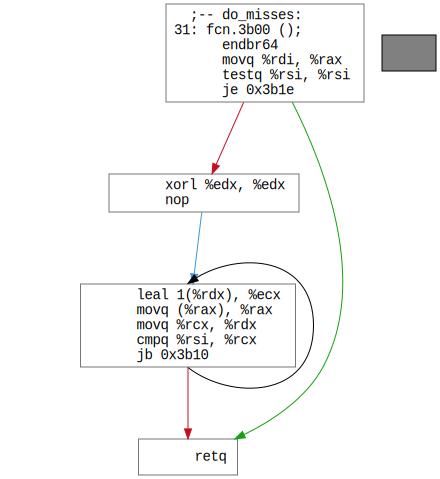

In [35]:
alloc[0].cfg("do_misses")

As you can see, there are only 5 instructions and one of them is an access.  The load which accounts for 0.2 of the instructions in the loop body.  Since MPI of 0.2, means that the miss rate for the `movl` in the loops is around 100%.

Your task is to speed up `do_misses()` and the best way to do that is to reduce MPI by allocating `MissingLinks` in such a way that you maximize spatial locality across the miss machine.

A couple of things to keep in mind:

1. This benchmark is only 12.5% of your grade, and your work on the other benchmarks will get you most of those points.  It's also the hardest part.  Work on it last.

2. A locality-aware allocator is probably more complex than a non-locality-aware allocator.  If you add too much complexity, it will reduce performance on the other benchmarks.

3. Remember that the key to spatial locality is to fit your data (in this case the links in the miss machine) into the smallest possible number of cache lines possible.

## Useful C++

C++ likes to keep you safe by not letting you convert pointers to integers or letting you convert pointers from one type to another.  However, memory allocators need to break the rules occasionally to transform untyped bytes into objects.  The main tool for this is `reinterpret_cast<>()` and the "in place" `new` operator.  `ReferenceAllocator` provides an example of how to use both mechanisms.

### `reinterpret_cast<>()`

 `reinterpret_cast<>()` let's you change a values from one type to another as long as they are the same size.  So you can do this:

```C++
char *x;
int *y = reinterpret_cast<int *>(x);

// or 

void * x = alloc_chunk();
T * t = reinterpret_cast<T*>(x);
```

If you are familiar with C's `(T*)(x)` casting syntax, `reinterpret_cast` is equivalent, but preferred because it's easier to spot in code.

A related tool is `uintptr_t`, which is an unsigned integer that is the same size as a pointer.  So you can increment a pointer by one byte doing this:

```C++
int * x = new int;
uintptr_t n = reinterpret_cast<uintptr_t>(x);
n += 1;
x = reinterpret_cast<int *>(n);
```

Note that this is different than;

```C++
int *x = new int;
x++;
```

Since, under C++'s pointer arithmetic rules, if you increment a pointer of type `T*`, it actually increases the address by `sizeof(T)` (i.e., 4 bytes for an `int`).


### In-Place `new`

If you call `new T`, C++ will allocate some memory to hold a new instance of `T` and then run `T`'s constructor on it.  But what if _you_ want to decide where to construct the new instance? 

In that case you can say something like this:

```
void * p = alloc_chunk();
new (p) T;
```

To construct a new instance of `T` "in place" in the memory pointed to by `p`.  Or, if you wanted to initialize an instance of `T` starting at the 11th byte after `p`, you could do this:

```
uintptr_t n = reinterpret_cast<uintptr_t>(p);
n += 11;
void *q = reinterpret_cast<void*>(n);
new (q) T;
```

Why would anyone ever want to do that?

## How To Do This Lab

Here's some tips about how to approach this lab.

### The Lifecycle of a Memory Allocator

Here are the basic steps that your memory allocator must accomplish over it's lifetime.

1.  Initialize itself and its internal data structures.
2.  Respond to calls to `alloc()`
    1.  If the allocator has recycled objects, initialize one and return it.
    2.  Otherwise, if the allocator has new (not recycled) memory on hand, initialize one object's worth and return it.
    3.  Otherwise, if the allocator has no memory on hand, call `alloc_chunk()`, and goto 2.B.
3.  Respond to calls to `free()`
    1.  Store the object somewhere so it can be recycled.
4.  On destruction, called `free_chunk()` to deallocate all the memory you allocated with `alloc_chunk()`.

    
### Thing to Try

Here are some ideas about how to get started:

1.  The main difference between what you'll implement in `AlignedAllocator` and `posix_memalign()` is that `AlignedAllocator` only needs to allocate objects of a single size.  You can exploit this fact to improve performance.
2.  `alloc_chunk()` let's you allocate enough space to store many objects.  Since the objects are all the same size and alignment, you can calculate where each of instance of `T` will reside with the chunk.
3.  You need to recycle.  So, think about how you can efficiently store `free()`ed memory while it's waiting to be re-`alloc()`ed.
4.  You will need to choose the right data structures and algorithms to achieve good performance.  Think about what each data structure _needs_ to do and what operations are most important to performance.  Use the STL! (In past labs, I noticed many students implementing things that the STL already provides.  Don't re-invent -- or debug -- the wheel!)

Your overall score is based on your allocator's performance across eight benchmarks.  This might seem daunting, but the performance of the benchmarks is very correlated:  If you speed up your allocator for one of them, it will get faster for many of the others.

With that in mind, start with the simplest ones and go from there.  I'd proceed in this order:

1.  The `microbench` function.
2.  The `bench` function.
3.  The `miss_machine` function.

## Do Your Work Here

Below are the key commands you'll need to make progress on the lab.  Your solution should go in `AlignedAllocator.hpp`:

### Compiling and Running

You can compile and the benchmarks locally using this command.  This is only useful for debugging.  Performance running locally is not very meaningful:

In [72]:
alloc = build(code(r"""
#include <stdlib.h>
#include<set>
#include<stack>
#include<iostream>
#include<cstring>
#include"ChunkAlloc.hpp"

template<
    class T,          // This is the type we are allocating.  You can assume this is less than or equal to 4kB
    size_t ALIGNMENT  // The alignment at which we much allocate the objects.  You can assume this is less than or equal to 4kB
    >
class AlignedAllocator {
    std::set<T*> chunks; // We store everything we allocated so we can clean up in the destructor.
    std::stack<void*> available;
public:
    typedef T ItemType; // This will make T available as AlignedAllocator::ItemType
    static const size_t Alignment = ALIGNMENT;  // Likewise, we can access the alignment as AlignedAllocator::Alignment
    const uint iterations = sizeof(T) / ALIGNMENT + 1;
    const uint blocksize = iterations * ALIGNMENT;

    AlignedAllocator() {}

    T * alloc() {
        void* p = NULL;
        T* c = NULL;
        if(available.empty()) {
            p = alloc_chunk();
            new (p) T;
            c = reinterpret_cast<T*>(p);
            new (c) T;
            chunks.insert(c);
            uintptr_t n = reinterpret_cast<uintptr_t>(p);
            if(ALIGNMENT < sizeof(T)) {
                for(uint i = 1; i < CHUNK_SIZE / blocksize; i++) {
                    for(uint j = 0; j < iterations; j++) {
                        n += ALIGNMENT;
                    }
                    available.push(reinterpret_cast<void*>(n));
                }
            }
            else{
                for(uint i = 1; i < CHUNK_SIZE / ALIGNMENT; i++) {
                    n += ALIGNMENT;
                    available.push(reinterpret_cast<void*>(n));
                }
            }
        }
        else {
            p = available.top();
            new (p) T;
            available.pop();
            c = reinterpret_cast<T*>(p);
            new (c) T;
        }
        return c;
    }
    
    void free(T * p) {
        memset(p, 0, sizeof(T));
        available.push(reinterpret_cast<void*>(p));
    }

    ~AlignedAllocator() {
        for(auto & p: chunks) {
            free_chunk(reinterpret_cast<void*>(p));
        }
    }
};

template<class T, size_t ALIGNMENT>
const size_t AlignedAllocator<T, ALIGNMENT>::Alignment;
""", file_name="AlignedAllocator.hpp"), arg_map(OPTIMIZE="-O3", MORE_SRC="ChunkAlloc.cpp Allocator.cpp"))

  0%|          | 0/1 [00:00<?, ?it/s]

In [75]:
to_run = arg_map(executable=alloc,
                 function=["allocator_bench_solution"], 
                 arguments=arg_map(count=128*1024*16, seed=42),
                 run_options=arg_map(MHz=3500))
to_run += arg_map(executable=alloc, function=["allocator_microbench_solution"], 
                 arguments=arg_map(count=1600000, seed=42),
                 run_options=arg_map(MHz=3500))
to_run += arg_map(executable=alloc, function=["miss_machine_solution"], 
                  arguments=arg_map(link_count=4096, access_count=100000000, seed=42),
                  run_options=arg_map(MHz=3500))

alloc_run = run_list(to_run,
                     perf_counters=["L1-DCACHE-LOAD-MISSES",  "PERF_COUNT_HW_INSTRUCTIONS", "PERF_COUNT_HW_CPU_CYCLES"])


You are submitting a job for lab "Lab 4: Caches II" (caches2).
Creating job 04c9f91b-fc8c-4f03-8f3d-410123ac4239 0.00 0.00
Ready for submission. 2.56 2.56
Job 04c9f91b-fc8c-4f03-8f3d-410123ac4239 is in state 'PUBLISHED'. 1.37 3.93 
Job 04c9f91b-fc8c-4f03-8f3d-410123ac4239 is in state 'RUNNING'. 1.04 4.96....... 
Job 04c9f91b-fc8c-4f03-8f3d-410123ac4239 is in state 'DONE_RUNNING'. 8.88 13.84.. 
Job 04c9f91b-fc8c-4f03-8f3d-410123ac4239 succeeded. 3.12 16.97Writing results 1.00 17.97
  0%|          | 0/3 [00:00<?, ?it/s]
Updated these files: ./.cfiddle/builds/build/71d44f9dff577cd6aae72b9d7060639a_AlignedAllocator/AlignedAllocator.hpp.allocator_bench_solution(2097152, 42).csv
./.cfiddle/builds/build/71d44f9dff577cd6aae72b9d7060639a_AlignedAllocator/AlignedAllocator.hpp.allocator_microbench_solution(1600000, 42).csv
./.cfiddle/builds/build/71d44f9dff577cd6aae72b9d7060639a_AlignedAllocator/AlignedAllocator.hpp.miss_machine_solution(4096, 100000000, 42).csv
./.cfiddle/builds/results.pickle
J

In [76]:
alloc_run_data = PE_calc(alloc_run.as_df())
display(alloc_run_data)

,function,access_count,OPTIMIZE,tag,requestedMHz,count,realMHz,cycles,IC,CPI,CT,ET,L1_cache_misses,L1_MPI
0,allocator_bench_solution,NaN,-O3,bench-3-bytes,3500,2097152.0,3341.905728,91566546,155223971,0.589900,2.992305e-10,0.027400,1889373,0.012172
1,allocator_bench_solution,NaN,-O3,bench-125-bytes,3500,2097152.0,3160.074098,165513621,164850772,1.004021,3.164483e-10,0.052376,4930549,0.029909
2,allocator_bench_solution,NaN,-O3,bench-4096-bytes,3500,2097152.0,2483.903077,1497080675,165551452,9.042993,4.025922e-10,0.602713,96942139,0.585571
3,allocator_microbench_solution,NaN,-O3,alloc-4-bytes,3500,1600000.0,3337.854607,44004940,104674669,0.420397,2.995936e-10,0.013184,583576,0.005575
4,allocator_microbench_solution,NaN,-O3,free-4-bytes,3500,1600000.0,2029.930878,70158674,70399143,0.996584,4.926276e-10,0.034562,360927,0.005127
5,allocator_microbench_solution,NaN,-O3,alloc-1024-bytes,3500,1600000.0,627.981768,56467681,70031979,0.806313,1.592403e-09,0.089919,1322392,0.018883
6,allocator_microbench_solution,NaN,-O3,free-1024-bytes,3500,1600000.0,691.881646,1641302397,84739267,19.368853,1.445334e-09,2.372230,4130891,0.048748
7,miss_machine_solution,100000000.0,-O3,miss-machine,3500,NaN,3483.995609,894233669,500000500,1.788466,2.870268e-10,0.256669,61213837,0.122428


If you want to just run your solution in `AlignedAllocator.hpp`, remove the "starter" functions from the list of functions run above.  You can run them in the cloud by removing `with local_exeuction():`.

### Drawing Graphs

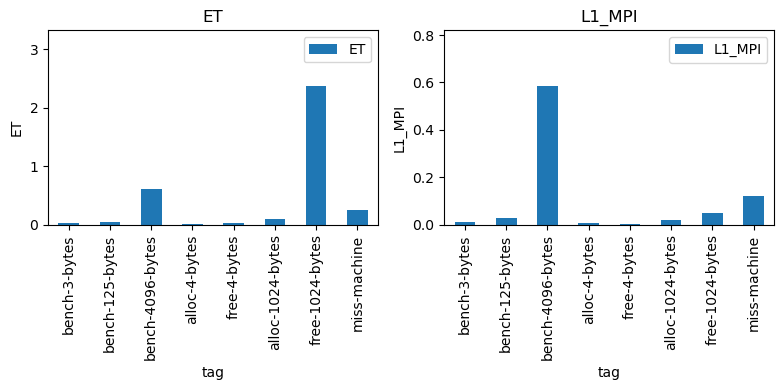

In [77]:
plotPEBar(df=alloc_run_data, what=[("tag", "ET"), ("tag", "L1_MPI")])

### Running the Regressions

There's a test suite that your code must pass and that the autograder will run.  You can run it like this:

In [73]:
!make run_tests.exe
!./run_tests.exe

/cse142L/cse141pp-archlab/compile.make:151: warning: overriding recipe for target 'help'
/cse142L/cfiddle/src/cfiddle/resources/make/cfiddle.make:100: warning: ignoring old recipe for target 'help'
g++ -c -Wall -Werror  -g3 -fPIC  -I. -I/cse142L/cfiddle/src/cfiddle/resources/include -I/usr/local/include    -MMD -save-temps=obj -std=gnu++17  run_tests.cpp -o build/x86_64-linux-gnu/run_tests.o
g++ build/x86_64-linux-gnu/run_tests.o build/x86_64-linux-gnu/ChunkAlloc.o   -L/cse142L/cfiddle/src/cfiddle/resources/include/../libcfiddle/build/x86_64-linux-gnu -lcfiddle  -pthread  -L/lib -lgtest -lgtest_main  -o run_tests.exe
[==========] Running 20 tests from 16 test suites.
[----------] Global test environment set-up.
[----------] 1 test from AllocatorTest/0, where TypeParam = ReferenceAllocator<Thing<4>, 16ul>
[ RUN      ] AllocatorTest/0.alloc_test2
[       OK ] AllocatorTest/0.alloc_test2 (606 ms)
[----------] 1 test from AllocatorTest/0 (606 ms total)

[----------] 1 test from AllocatorTe

If you'd prefer you write it to a file:

## Debugging 

Using the debugger in this lab is the same as the other labs.  Please check the documentation in those labs.

## Final Measurement

When you are done, make sure your best allocator is called `AlignedAllocator` in `AlignedAllocator.hpp`. Then you can submit your code to the Gradescope autograder.  It will run the commands given above and compute your grade.

Your grade is based on your speed up relative `ReferenceAllocator` on the eight benchmarks. 

For each of them, there's a target speedup given the table below.  

You don't get extra credit for beating the targets.  This will help ensure that your design in balanced:  You must do well at all 8 benchmarks to do well on the lab.

To get points, your code must also be correct.  The autograder will run the regressions in `run_tests.cpp` to check it's correctness.  There are hidden tests.

You can mimic what the autograder will do with the command below, and then run the next cell below to list them and the target speedups.

After you run it, the results will be in `autograde/bench.csv`, `autograde/microbench.csv`, and `autograde/miss_machine.csv` rather than `./bench.csv`, `./microbench.csv`, and `miss_machine.csv`.  This command builds and runs your code in a more controlled way by doing the following:

1.  Ignores all the files in your repo except `AlignedAllocator.cpp`.
2.  Copies those files into a clean clone of the starter repo.
3.  Runs your code using `run_bench.py`
5.  It then runs `autograde.py` to compute your grade.

Running the cell below will do the same thing as the Geradescope autograder.  And the cell below shows the name and target speedups for each benchmark.  This takes a few minutes to run.

In [64]:
!cse142 job run --take AlignedAllocator.hpp  --lab caches2-bench --force autograde

You are submitting a job for lab "Lab 4: Caches II (Benchmark)" (caches2-bench).
You are running a autograde job.  Here's what will get run:
  git clone --branch main https://github.com/CSE142/fa22-CSE142L-caches2-starter.git autograde
  make -C autograde copy-files LAB_SUBMISSION_DIR=. autograde
The outputs will appear in the 'autograde' directory.  Check STUDENT_EDITABLE_FILES in Makefile to see what source files will be copied over.
Creating job 4cf81fbd-b9bb-44c3-b1be-be37b6248503 0.00 0.00
Ready for submission. 2.40 2.40
Job 4cf81fbd-b9bb-44c3-b1be-be37b6248503 is in state 'PUBLISHED'. 2.27 4.67 
Job 4cf81fbd-b9bb-44c3-b1be-be37b6248503 is in state 'RUNNING'. 1.04 5.71....................................................................................... 
Job 4cf81fbd-b9bb-44c3-b1be-be37b6248503 is in state 'DONE_RUNNING'. 91.34 97.05... 
Job 4cf81fbd-b9bb-44c3-b1be-be37b6248503 succeeded. 4.14 101.19Writing results 1.00 102.19
make: Entering directory '/tmp/djr_scratch/tmp13h4n8f

In [65]:
render_csv("autograde/autograde.csv")

,OPTIMIZE,MORE_SRC,function,count,seed,link_count,access_count,MHz,tag,ET,PERF_COUNT_HW_INSTRUCTIONS,PERF_COUNT_HW_CPU_CYCLES
0,-O3,canary.cpp Allocator.cpp ChunkAlloc.cpp,allocator_bench_solution,2097152.0,42.0,NaN,NaN,3500,bench-3-bytes,0.027213,155223982,90938680
1,-O3,canary.cpp Allocator.cpp ChunkAlloc.cpp,allocator_bench_solution,2097152.0,42.0,NaN,NaN,3500,bench-125-bytes,0.053083,164857418,167798732
2,-O3,canary.cpp Allocator.cpp ChunkAlloc.cpp,allocator_bench_solution,2097152.0,42.0,NaN,NaN,3500,bench-4096-bytes,0.601569,165549433,1491659519
3,-O3,canary.cpp Allocator.cpp ChunkAlloc.cpp,allocator_microbench_solution,1600000.0,42.0,NaN,NaN,3500,alloc-4-bytes,0.012885,104383048,43143895
4,-O3,canary.cpp Allocator.cpp ChunkAlloc.cpp,allocator_microbench_solution,1600000.0,42.0,NaN,NaN,3500,free-4-bytes,0.035301,70398663,71413103
5,-O3,canary.cpp Allocator.cpp ChunkAlloc.cpp,allocator_microbench_solution,1600000.0,42.0,NaN,NaN,3500,alloc-1024-bytes,0.088663,70026445,55232452
6,-O3,canary.cpp Allocator.cpp ChunkAlloc.cpp,allocator_microbench_solution,1600000.0,42.0,NaN,NaN,3500,free-1024-bytes,2.380780,84739183,1640316808
7,-O3,canary.cpp Allocator.cpp ChunkAlloc.cpp,miss_machine_solution,NaN,42.0,4096.0,100000000.0,3500,miss-machine,0.255085,500000498,888960074
8,-O3,canary.cpp Allocator.cpp ChunkAlloc.cpp,_canary,NaN,NaN,NaN,NaN,3500,canary,6.173970,14500008586,21504399631


You can check the performance results like this:

In [66]:
#run it locally
!./autograde.py --submission autograde --results autograde.json

from autograde import compute_all_scores
df = compute_all_scores(dir="autograde")
display(df)
print(f"total points: {round(sum(df['score']), 2)}")

,label,target_speedup,reference_ET,ET,speedup,weight,bench_score,score
0,bench-3-bytes,5.71,0.597924,0.027213,21.972079,0.125,48.099999,12.500000
1,bench-125-bytes,7.41,0.987832,0.053083,18.609127,0.125,31.391914,12.500000
2,bench-4096-bytes,3.52,2.177010,0.601569,3.618887,0.125,12.851160,12.500000
3,alloc-4-bytes,13.84,0.316849,0.012885,24.591295,0.125,22.210346,12.500000
4,free-4-bytes,9.34,0.252270,0.035301,7.146317,0.125,9.564129,9.564129
5,alloc-1024-bytes,1.83,4.399620,0.088663,49.621659,0.125,338.945755,12.500000
6,free-1024-bytes,23.48,0.453206,2.380780,0.190360,0.125,0.101342,0.101342
7,miss-machine,5.51,0.952187,0.255085,3.732822,0.125,8.468290,8.468290
8,canary,1.00,6.160000,6.173970,0.997737,0.000,0.000000,0.000000


total points: 80.63


The "score" column contains the number of points you'll receive.

You can also inspect the autograder's output.

In [ ]:
render_code("autograde.json")

Most of it is internal stuff that gradscope needs, but the key parts are the `score`, `max_score`, and `output` fields.

All that's left is commit your code:

In [84]:
!git commit -am "Solution to the lab."
!git push

[main 8e21c9e] Solution to the lab.
 1 file changed, 23 insertions(+), 14 deletions(-)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 256 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 674 bytes | 674.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:CSE142/fa22-CSE142L-caches2-caseyhild.git
   8fe2593..8e21c9e  main -> main


If `git commit` tell you something like:

```
*** Please tell me who you are.

Run

git config --global user.email "you@example.com"
git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'prcheng@dsmlp-jupyter-prcheng.(none)')
Warning: Permanently added the RSA host key for IP address '140.82.112.3' to the list of known hosts.
Everything up-to-date
```

Then you can do (but fill in your @ucsd.edu email and your name):

In [ ]:

!git config --global user.email "you@example.com"
!git config --global user.name "Your Name"

# Recap

This lab completes our tour of (single processor) memory systems.  It explored what's required to exploit temporal locality and when it does and does not exist.  It also looked at other key components of the memory hierarchy:  The lower-level caches and the TLB.   Finally, it developed an optimized version of 1-D convolution using tiling and renesting.  You should now be well-prepared for the next lab, where we will explore (among other things) how multiple processors further-complicate the performance of the memory hierarchy.

# Turning In the Lab

For each lab, there are two different assignments on gradescope:

1.  The lab notebook.
2.  The programming assignment.

There's also a pre-lab reading quiz on Canvas and a post-lab survey which is embedded below.

## The CSE142L Emergency Lab Submission Form

We do not accept late submissions.  However, sometimes things go wrong at submission time.  To accommodate this, we have the [Emergency Lab Submission Form](https://docs.google.com/forms/d/e/1FAIpQLSdPhzCyLgjmtzwF8frQ1Vrz_zHPaKurlcOf1mWMbAL3jaSVog/viewform).  It allows us to deal with submission problems in a fair and uniform way.

Here's the process:

1.  If you are having trouble submitting, commit your work, and fill out this form _before the deadline_.  THERE WILL BE NO EXCEPTIONS GRANTED.
2.  The commit has you provide for your github repo must be dated before the deadline.
3.  You can continue to try to submit via the normal gradescope.
4.  If you aren't able to successfully submit via gradescope, then submit a regrade request during the regrade period.
5.  We will review the contents of your github repo, the gradescope submission URLs, and the job IDs you provide.
6.  If there was some problem with the infrastructure, you can receive up to full credit.  If there was a problem on your side (e.g., not generating the PDF properly), you can earn up to 90% credit.

We will not address these issues on Piazza or via email.  

## Reading Quiz

The reading quiz is an online assignment on Canvas.  It's due before the class when we will assign the lab.

## The Note Book

You need to turn in your lab notebook and your programming assignment separately. 

After you complete the lab, you will turn it in by creating a version of the notebook that only contains your answers and then printing that to a pdf.

**Step 1:**  Save your workbook!!!

In [ ]:
!for i in 1 2 3 4 5; do echo Save your notebook!; sleep 1; done

**Step 2:**  Run this command:

In [83]:
!turnin-lab Lab.ipynb
!ls -lh Lab.turnin.ipynb

Wrote to Lab.turnin.ipynb
-rw-rw---- 1 child root 371K Nov 23 18:36 Lab.turnin.ipynb


The date in the above file listing should show that you just created `Lab.turnin.ipynb`

**Step 3:**  Click on this link to open it: [./Lab.turnin.ipynb](./Lab.turnin.ipynb)

**Step 4:**  Hide the table of contents by clicking the

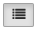

**Step 5:**  Select "Print" from _your browser's_ "file" menu.  Print directly to a PDF.

**Step 6:**  Make sure all your answers are visible and not cut off the side of the page.

**Step 7:**  Turn in that PDF via gradescope.

<div class="alert alert-block alert-danger">

**Print Carefully** It's important that you print directly to a PDF.  In particular, you should _not_ do any of the following:
    
1. **Do not** select "Print Preview" and then print that. (Remarkably, this is not the same as printing directly, so it's not clear what it is a preview of)
2. **Do not** select `Download as-> PDF via LaTex.  It generates nothing useful.
    
</div>

Once you have your PDF, you can submit it via gradescope.  In gradescope, you'll need to show us where all your answers are.  Please do this carefully, if we can't find your answer, we can't grade it.

## Lab Survey

Please fill out this survey when you've finished the lab.  You can only submit once.  Be sure to press "submit", your answers won't be saved in the notebook.

In [ ]:
from IPython.display import IFrame    
IFrame('https://docs.google.com/forms/d/e/1FAIpQLSdEyaIDy52FLLUzQEXoJJmz7ffQBN1-0Qdndu6wQ7NK8U6pZw/viewform', width=800, height=2000)
